# STAT 306 Project: Analysis

We first load the required libraries for the analysis part, as shown below.

In [1]:
library(readr, quietly = TRUE)
library(ggplot2, quietly = TRUE)
library(dplyr, quietly = TRUE)
library(reshape2, quietly = TRUE)
library(leaps, quietly = TRUE)
library(car, quietly = TRUE)

Warning message:
“package ‘dplyr’ was built under R version 4.3.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode




We read in the data, and rename the variables for readability and usability in our code

In [2]:
vehicle_emissions <- read_csv("data/vehicle_emissions.csv")

# Renaming the variables for convenience while keeping readability
colnames(vehicle_emissions) <- c("Model_Year", "Make", "Model", "Vehicle_Class", "Engine_Size_L", 
                                 "Cylinders", "Transmission", "Fuel_Type", "City_L_100km", 
                                 "Highway_L_100km", "Combined_L_100km", "Combined_MPG", 
                                 "CO2_Emissions_g_km", "CO2_Rating", "Smog_Rating")

head(vehicle_emissions, 5)
tail(vehicle_emissions, 5)

Rows: 739 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): Make, Model, Vehicle class, Transmission, Fuel type
dbl (10): Model year, Engine size (L), Cylinders, City (L/100 km), Highway (...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Model_Year,Make,Model,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,City_L_100km,Highway_L_100km,Combined_L_100km,Combined_MPG,CO2_Emissions_g_km,CO2_Rating,Smog_Rating
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2024,Acura,Integra A-SPEC,Full-size,1.5,4,AV7,Z,8.1,6.5,7.4,38,172,6,7
2024,Acura,Integra A-SPEC,Full-size,1.5,4,M6,Z,8.9,6.5,7.8,36,181,6,6
2024,Acura,Integra Type S,Full-size,2.0,4,M6,Z,11.1,8.3,9.9,29,230,5,6
2024,Acura,MDX SH-AWD,Sport utility vehicle: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2024,Acura,MDX SH-AWD Type S,Sport utility vehicle: Standard,3.0,6,AS10,Z,13.8,11.2,12.4,23,291,4,5


Model_Year,Make,Model,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,City_L_100km,Highway_L_100km,Combined_L_100km,Combined_MPG,CO2_Emissions_g_km,CO2_Rating,Smog_Rating
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2024,Volvo,V60 CC B5 AWD,Station wagon: Small,2,4,AS8,Z,10.0,7.5,8.9,32,207,5,5
2024,Volvo,V90 CC B6 AWD,Station wagon: Mid-size,2,4,AS8,Z,10.7,8.1,9.5,30,223,5,7
2024,Volvo,XC40 B5 AWD,Sport utility vehicle: Small,2,4,AS8,Z,9.9,7.8,9.0,31,210,5,5
2024,Volvo,XC60 B5 AWD,Sport utility vehicle: Small,2,4,AS8,Z,10.6,8.3,9.6,29,226,5,5
2024,Volvo,XC90 B6 AWD,Sport utility vehicle: Standard,2,4,AS8,Z,10.9,8.6,9.8,29,230,5,7


In [3]:
# Checking for NAs
na_count <- colSums(is.na(vehicle_emissions))
na_count

# Summary statistics
summary(vehicle_emissions[, c("Engine_Size_L", "Cylinders", "City_L_100km", "Highway_L_100km", "Combined_L_100km", "CO2_Emissions_g_km")])


Model_Year               Make              Model      Vehicle_Class 
                 0                  0                  0                  0 
     Engine_Size_L          Cylinders       Transmission          Fuel_Type 
                 0                  0                  0                  0 
      City_L_100km    Highway_L_100km   Combined_L_100km       Combined_MPG 
                 0                  0                  0                  0 
CO2_Emissions_g_km         CO2_Rating        Smog_Rating 
                 0                  0                  0

 Engine_Size_L     Cylinders       City_L_100km   Highway_L_100km 
 Min.   :1.200   Min.   : 3.000   Min.   : 4.40   Min.   : 4.400  
 1st Qu.:2.000   1st Qu.: 4.000   1st Qu.:10.05   1st Qu.: 7.650  
 Median :3.000   Median : 6.000   Median :12.20   Median : 9.300  
 Mean   :3.086   Mean   : 5.537   Mean   :12.39   Mean   : 9.429  
 3rd Qu.:3.600   3rd Qu.: 6.000   3rd Qu.:14.50   3rd Qu.:10.800  
 Max.   :8.000   Max.   :16.000   Max.   :30.30   Max.   :20.900  
 Combined_L_100km CO2_Emissions_g_km
 Min.   : 4.40    Min.   :104.0     
 1st Qu.: 9.00    1st Qu.:209.5     
 Median :11.00    Median :260.0     
 Mean   :11.06    Mean   :258.9     
 3rd Qu.:12.75    3rd Qu.:299.0     
 Max.   :26.10    Max.   :608.0     

We observe that there is no NA values found in our data. Below we are converting categorical variables into factors to be able to use them in linear regression models.

In [4]:
# Converting categorical variables into factors for use in linear regression models
vehicle_emissions$Model_Year <- factor(vehicle_emissions$Model_Year)
vehicle_emissions$Make <- factor(vehicle_emissions$Make)
vehicle_emissions$Model <- factor(vehicle_emissions$Model)

vehicle_emissions$Vehicle_Class <- factor(vehicle_emissions$Vehicle_Class)
vehicle_emissions$Cylinders <- factor(vehicle_emissions$Cylinders)
vehicle_emissions$Transmission <- factor(vehicle_emissions$Transmission)
vehicle_emissions$Fuel_Type <- factor(vehicle_emissions$Fuel_Type)

vehicle_emissions$CO2_Rating <- factor(vehicle_emissions$CO2_Rating)
vehicle_emissions$Smog_Rating <- factor(vehicle_emissions$Smog_Rating)


# EDA of Continuous Variables

**Continuous variables:** Engine_Size_L, City_L_100km, Highway_L_100km, Combined_L_100km, Combined_MPG

**Response variable:** CO2_Emissions_g_km

First we would like to view the summary statistics of the continuous variables

In [5]:
summary_stats <- summary(vehicle_emissions[c("Engine_Size_L", "City_L_100km", "Highway_L_100km", "Combined_L_100km", "Combined_MPG", "CO2_Emissions_g_km")])
print(summary_stats)

 Engine_Size_L    City_L_100km   Highway_L_100km  Combined_L_100km
 Min.   :1.200   Min.   : 4.40   Min.   : 4.400   Min.   : 4.40   
 1st Qu.:2.000   1st Qu.:10.05   1st Qu.: 7.650   1st Qu.: 9.00   
 Median :3.000   Median :12.20   Median : 9.300   Median :11.00   
 Mean   :3.086   Mean   :12.39   Mean   : 9.429   Mean   :11.06   
 3rd Qu.:3.600   3rd Qu.:14.50   3rd Qu.:10.800   3rd Qu.:12.75   
 Max.   :8.000   Max.   :30.30   Max.   :20.900   Max.   :26.10   
  Combined_MPG   CO2_Emissions_g_km
 Min.   :11.00   Min.   :104.0     
 1st Qu.:22.00   1st Qu.:209.5     
 Median :26.00   Median :260.0     
 Mean   :27.39   Mean   :258.9     
 3rd Qu.:31.00   3rd Qu.:299.0     
 Max.   :64.00   Max.   :608.0     


Create histograms to visualize the distributions of each continuous variable. Histograms are great for understanding the shape of the distribution (e.g., normal, skewed, bimodal).

In [6]:
options(repr.plot.width = 15, repr.plot.height = 9)

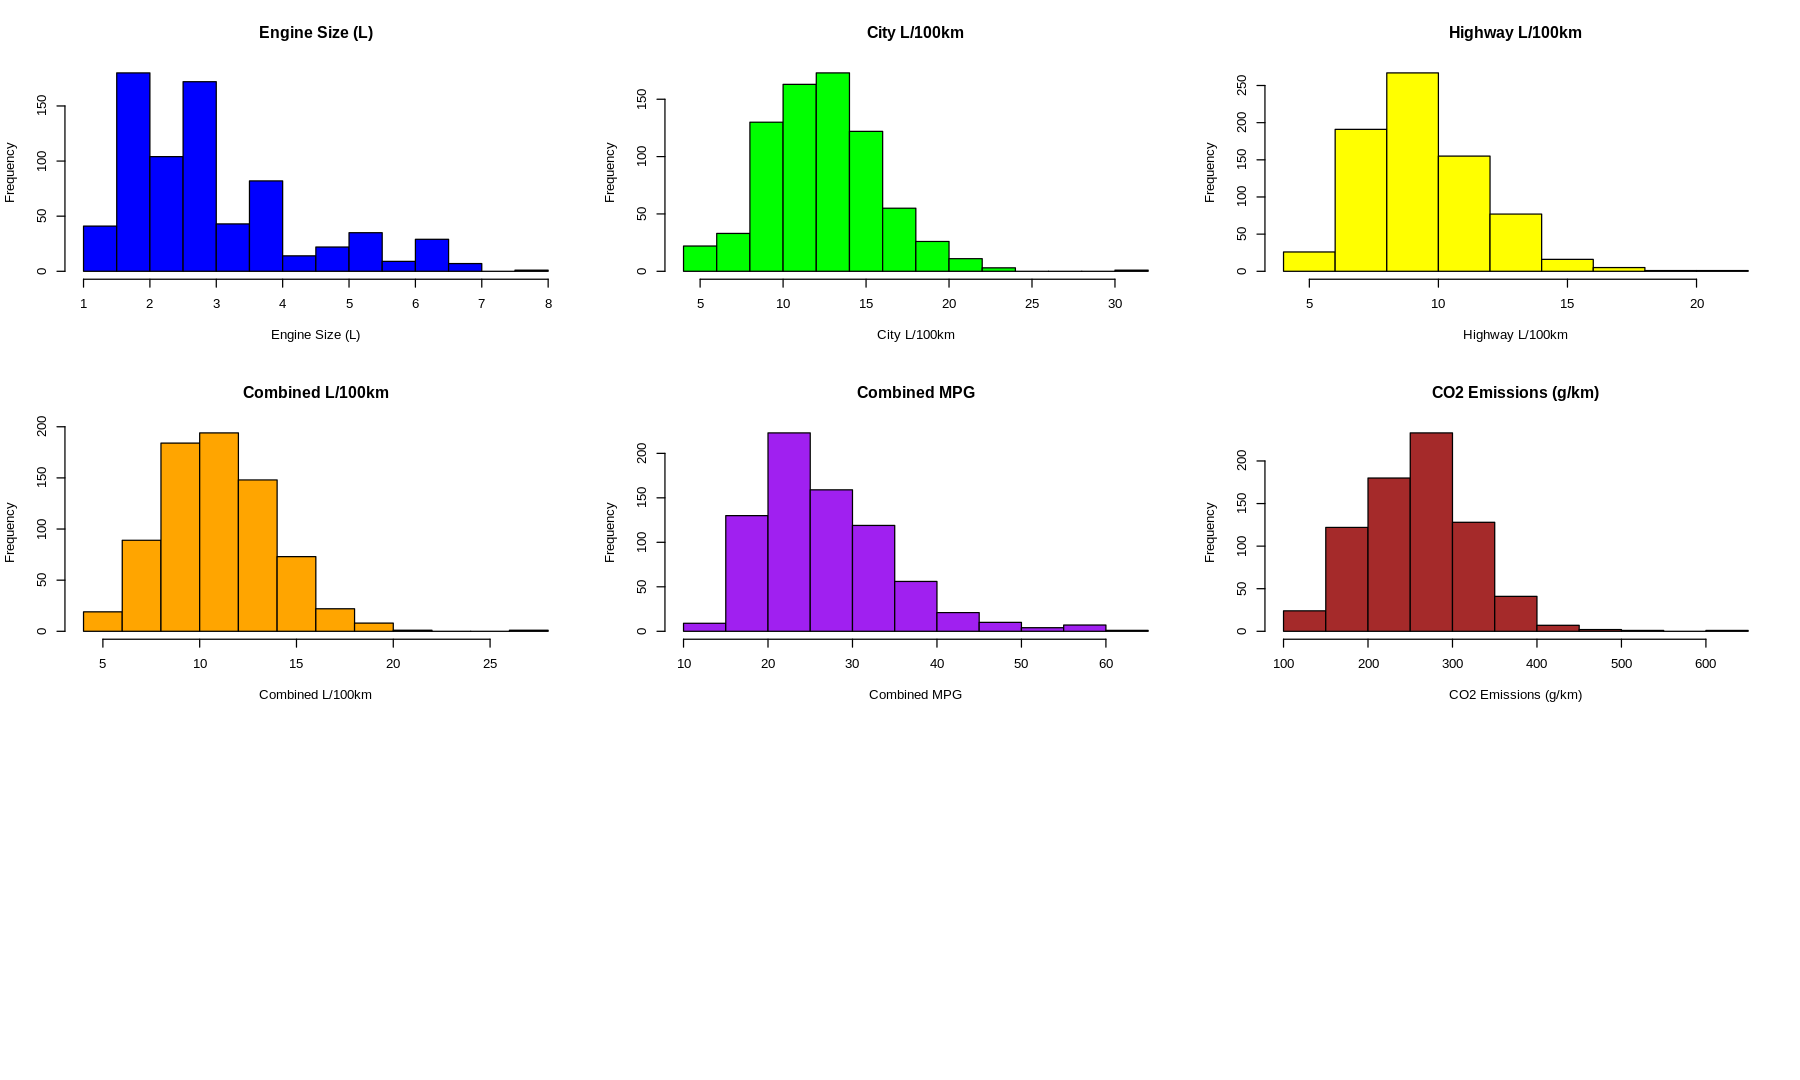

In [7]:
par(mfrow=c(3,3)) # Adjust layout to fit all histograms

hist(vehicle_emissions$Engine_Size_L, main="Engine Size (L)", xlab="Engine Size (L)", col="blue")
hist(vehicle_emissions$City_L_100km, main="City L/100km", xlab="City L/100km", col="green")
hist(vehicle_emissions$Highway_L_100km, main="Highway L/100km", xlab="Highway L/100km", col="yellow")
hist(vehicle_emissions$Combined_L_100km, main="Combined L/100km", xlab="Combined L/100km", col="orange")
hist(vehicle_emissions$Combined_MPG, main="Combined MPG", xlab="Combined MPG", col="purple")
hist(vehicle_emissions$CO2_Emissions_g_km, main="CO2 Emissions (g/km)", xlab="CO2 Emissions (g/km)", col="brown")

# Reset layout
par(mfrow=c(1,1))


### Observations from the histograms:

- **Engine Size (L):** The distribution of engine sizes is right-skewed, with a majority of vehicles having smaller engines (around 1 to 3 liters), and a few vehicles having larger engine sizes.
- **City L/100km:** The distribution of fuel consumption in the city shows a slight right skew, indicating that most vehicles consume between approximately 5 and 15 liters per 100 kilometers, with fewer vehicles being less fuel-efficient (consuming more).
- **Highway L/100km:** The fuel consumption on the highway appears to be normally distributed with a small right skew, with most vehicles consuming between 5 and 15 liters per 100 kilometers. It shows that vehicles tend to be more fuel-efficient on the highway compared to city driving.
- **Combined L/100km:** This variable represents the combined city and highway fuel consumption. The distribution seems to be slightly right-skewed, similar to the individual city and highway distributions. Most vehicles are concentrated around 5 to 15 liters per 100 kilometers.
- **Combined MPG:** The distribution of combined miles per gallon is left-skewed, indicating that a larger number of vehicles have higher MPG ratings, which signifies better fuel efficiency.
- **CO2 Emissions (g/km):** The CO2 emissions distribution is right-skewed, with most vehicles emitting between approximately 100 and 300 grams per kilometer. A smaller number of vehicles have very high emissions.

### Insights from above observations:

1. **Skewness:** Right-skewed distributions for engine size, fuel consumption, and CO2 emissions suggest the presence of outliers with high values that can potentially influence any predictive modeling.
2. **Fuel Efficiency:** Most vehicles are concentrated in the mid-range of fuel consumption, both in the city and on the highway, indicating that there might be a common standard of fuel efficiency among the sampled vehicles.
3. **CO2 Emissions:** There is a wide range of CO2 emissions, but with a concentration of vehicles in the lower emission range. This suggests that while there are vehicles that are not very environmentally friendly, the majority have lower emissions.
4. **Potential Transformations:** Given the skewness in some of these distributions, transformations such as logarithmic scaling might be necessary before using these variables in linear regression models to meet the assumption of normality of residuals.

Box plots help identify outliers and provide a visual representation of the data's quartiles.

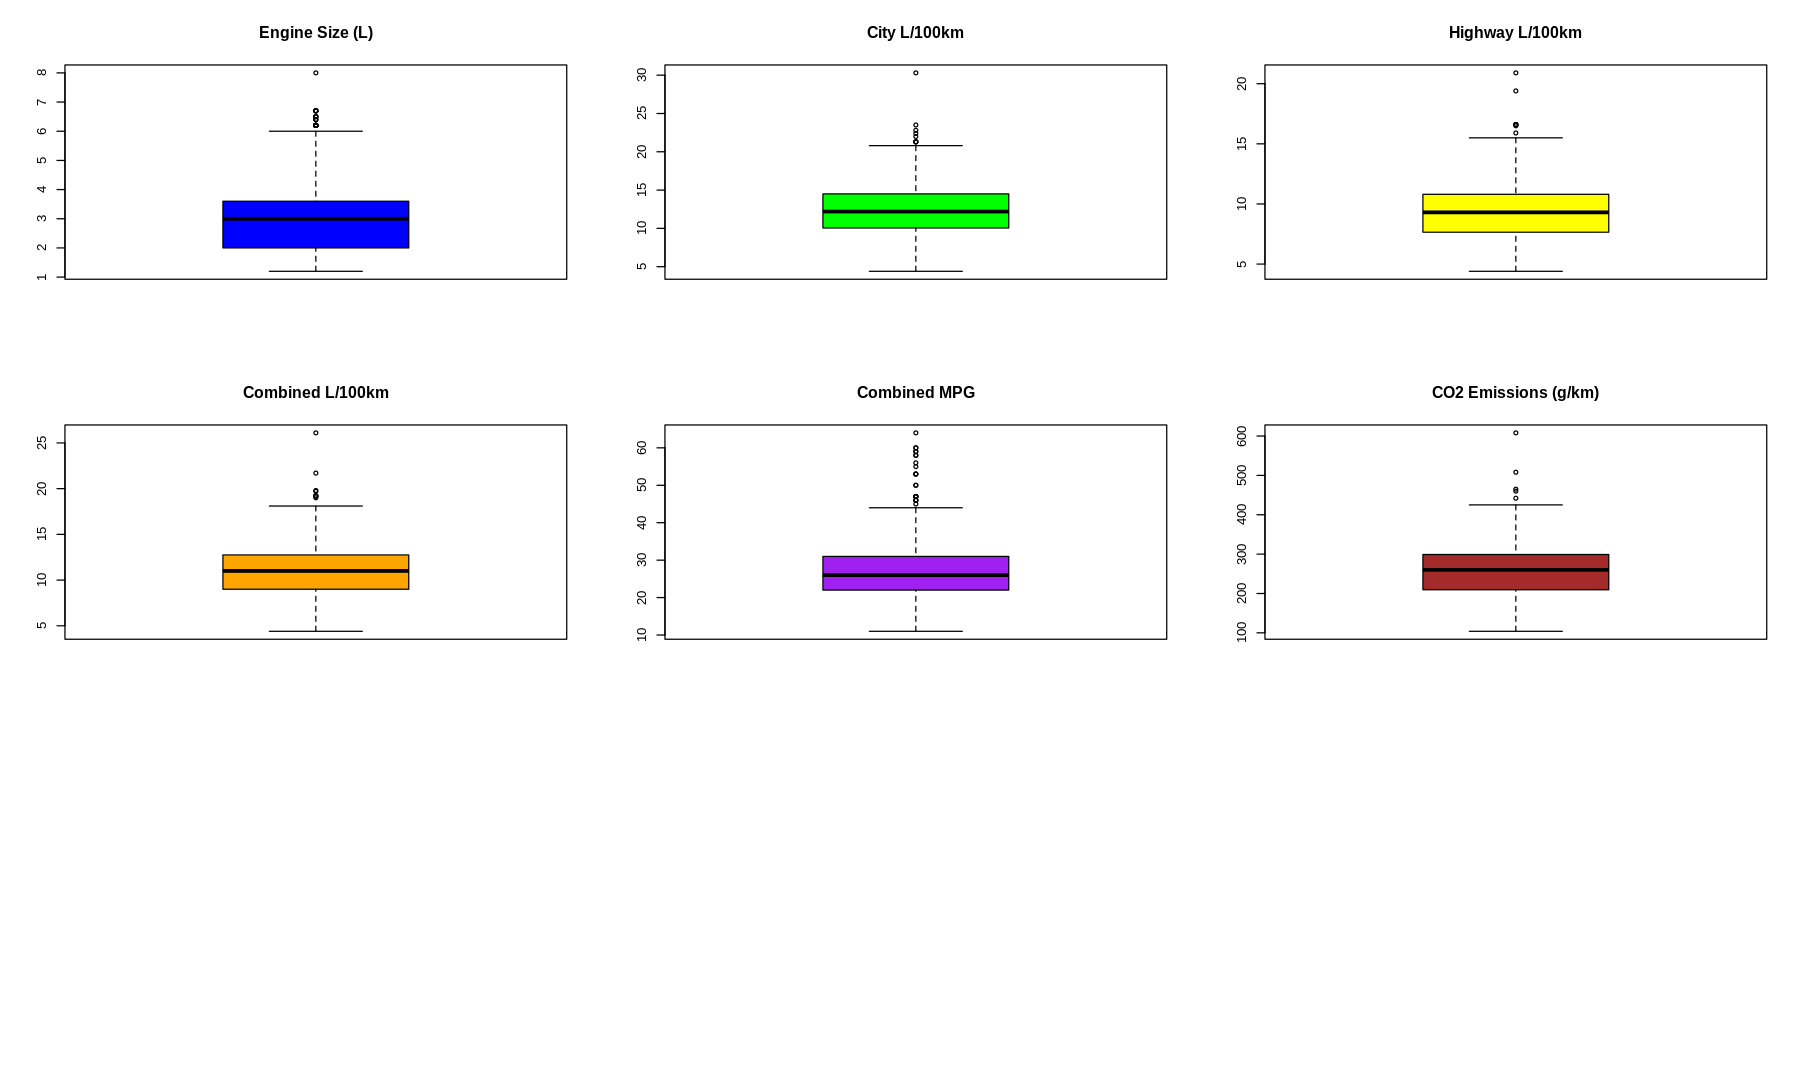

In [8]:
par(mfrow=c(3,3)) # Adjust layout to fit all box plots

boxplot(vehicle_emissions$Engine_Size_L, main="Engine Size (L)", col="blue")
boxplot(vehicle_emissions$City_L_100km, main="City L/100km", col="green")
boxplot(vehicle_emissions$Highway_L_100km, main="Highway L/100km", col="yellow")
boxplot(vehicle_emissions$Combined_L_100km, main="Combined L/100km", col="orange")
boxplot(vehicle_emissions$Combined_MPG, main="Combined MPG", col="purple")
boxplot(vehicle_emissions$CO2_Emissions_g_km, main="CO2 Emissions (g/km)", col="brown")

# Reset layout
par(mfrow=c(1,1))


### Observations from boxplots of continuous variables:
- **Engine Size (L):** The median engine size is around 3 liters, and the distribution appears fairly symmetrical around the median. There are a few outliers indicating vehicles with very large engine sizes.
- **City L/100km:** There is a higher variation in city fuel consumption compared to engine size, with the median around 12 L/100km. There are several outliers, suggesting that some vehicles are much less efficient in the city than the majority.
- **Highway L/100km:** The median highway fuel consumption is lower than city fuel consumption, indicative of better efficiency. The spread is similar, and outliers are present, indicating some vehicles with particularly high fuel consumption on the highway.
- **Combined L/100km:** The combined fuel consumption, which takes both city and highway driving into account, shows a median that lies between the city and highway medians. This is expected as it is a composite measure. There are outliers on the higher end, pointing to less efficient vehicles.
- **Combined MPG:** This measure of fuel efficiency shows a higher median value, indicating that many vehicles are relatively efficient. The left skewness observed in the histogram is also visible here, with a cluster of vehicles having very high MPG ratings (i.e., greater fuel efficiency). There are outliers, which in the context of MPG, represent vehicles with unusually high fuel efficiency.
- **CO2 Emissions (g/km):** CO2 emissions have a higher median compared to other variables, with significant right skewness showing that while most vehicles have moderate emission levels, there are some with exceptionally high emissions, as indicated by outliers.

### Insights from above observations:
1. **Central Tendency:** The median line within each box gives you the median value of the distribution, which is robust against outliers and hence provides a reliable central location measure.
2. **Variability:** The length of the box (interquartile range, IQR) shows the spread of the middle 50% of the data. A longer box means more variability.
3. **Outliers:** Points beyond the whiskers are considered outliers. These could be exceptional cases or data entry errors and warrant further investigation.
4. **Symmetry:** If the median line is in the center of the box, and the whiskers are approximately the same length, the distribution is roughly symmetrical. If not, the data is skewed.

Next we can check the scatterplots as well as the correlation between each continuous variable

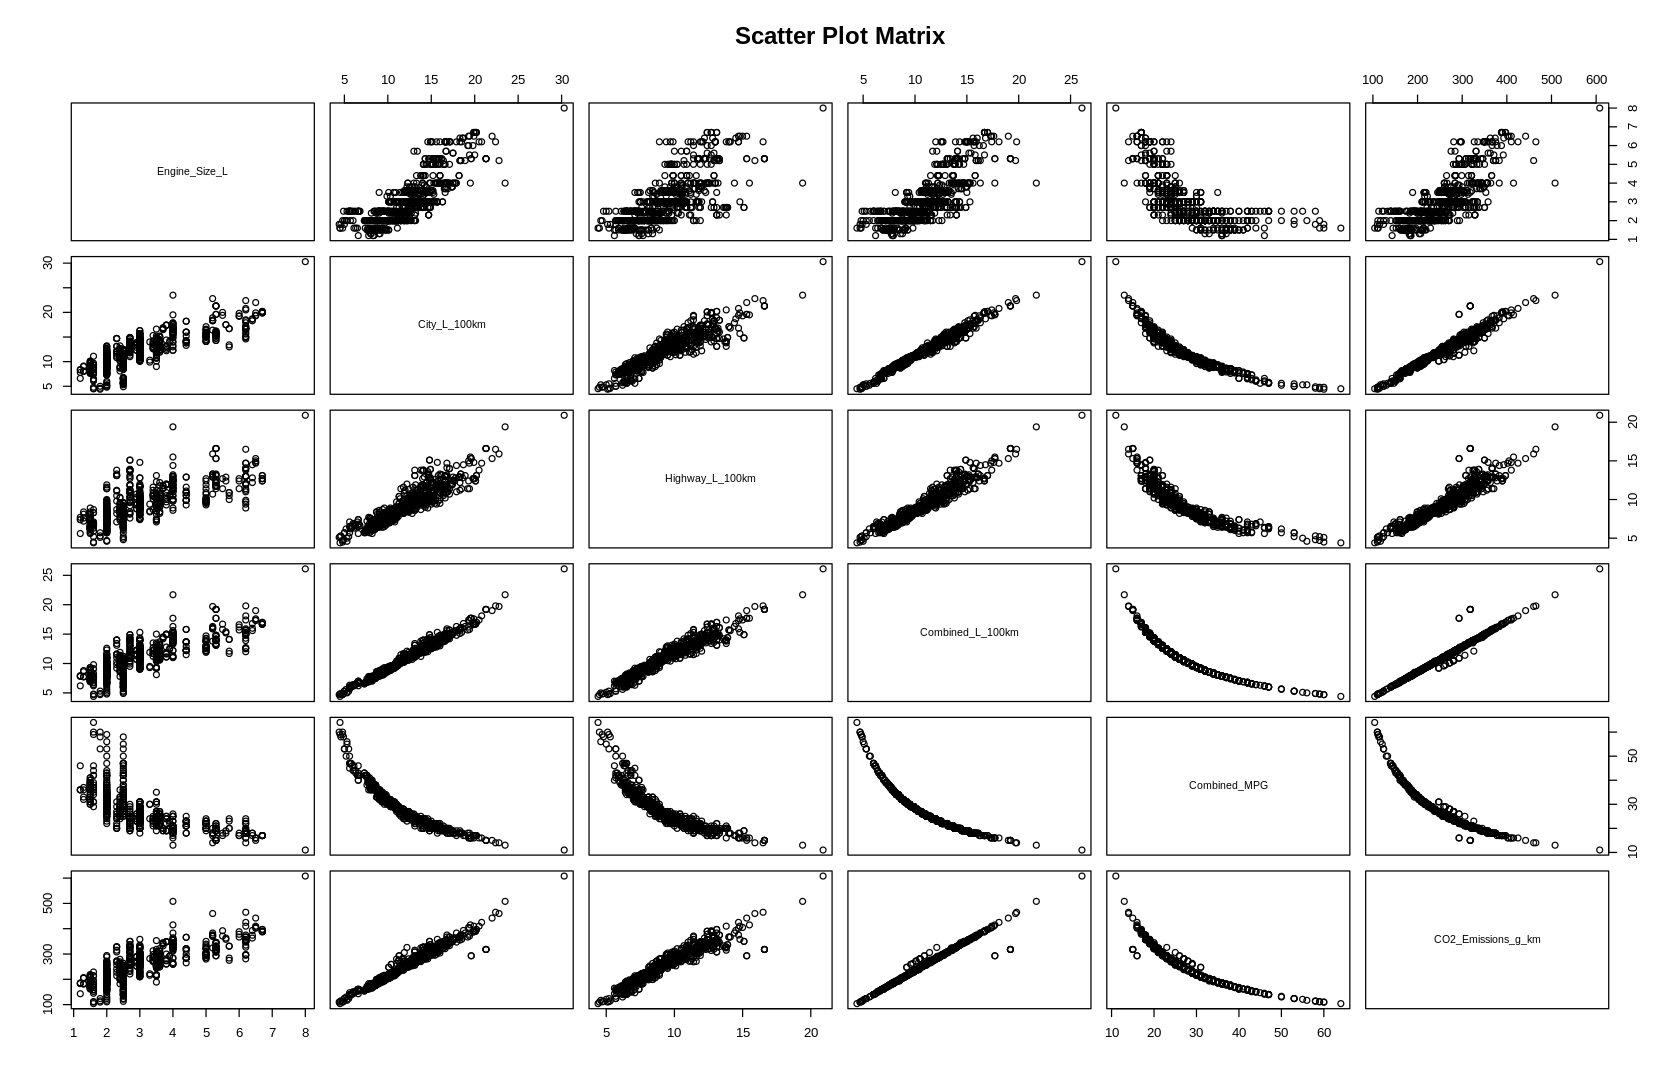

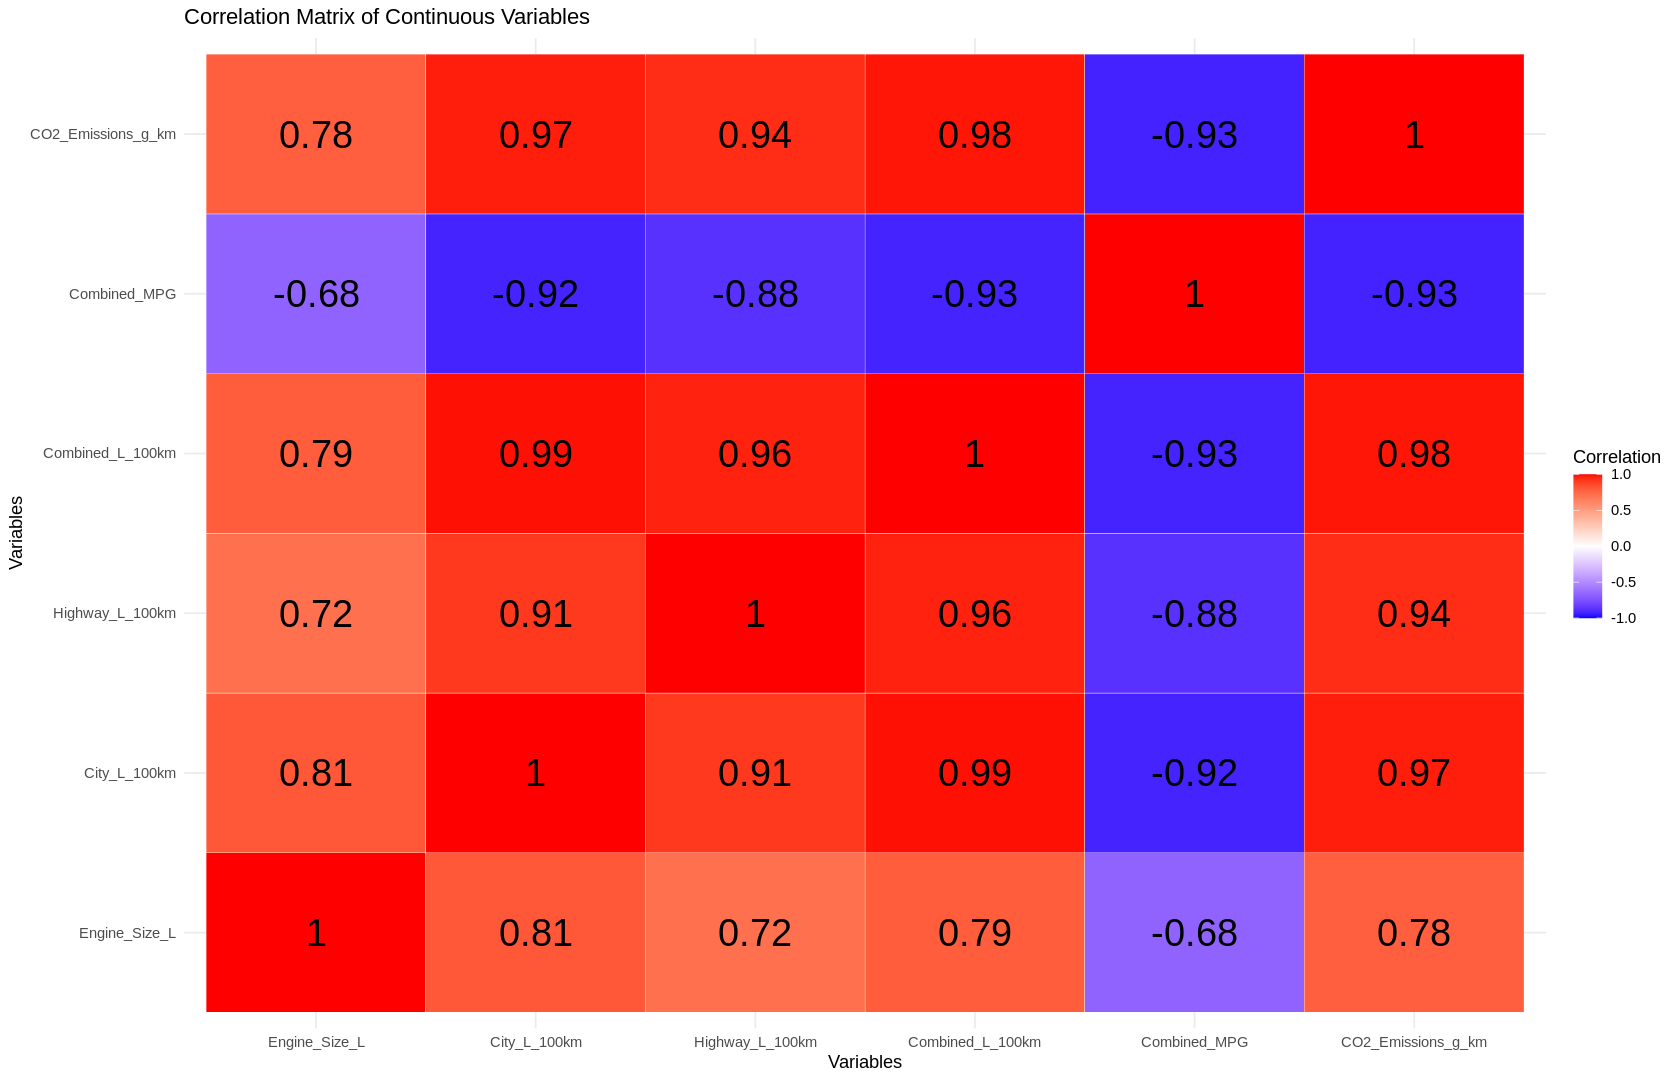

In [9]:
options(repr.plot.width = 14, repr.plot.height = 9)

continuous_vars <- vehicle_emissions[, c("Engine_Size_L", "City_L_100km", "Highway_L_100km", "Combined_L_100km", "Combined_MPG", "CO2_Emissions_g_km")]
pairs(continuous_vars, main = "Scatter Plot Matrix")

# Make the correlation matrix with only continuous variables
correlation_matrix <- cor(continuous_vars)
melted_cor_matrix <- melt(correlation_matrix)

ggplot(data = melted_cor_matrix, aes(Var1, Var2, fill = value, label = round(value, 2))) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "blue", mid = "white", high = "red",
                       midpoint = 0, limits = c(-1, 1), name = "Correlation") +
  geom_text(color = "black", size = 8) +
  theme_minimal() +
  labs(title = "Correlation Matrix of Continuous Variables",
       x = "Variables",
       y = "Variables")

## What do we do with this multicollinearity and scatterplots that show non-linear relationship??? 
1. Remove some highly correlated variables that do the same thing (fuel consumption only include Combined since it represents overall fuel consumption).
2. Apply transformation to some variables if needed?
3. Check VIF (greater than 10 is bad)
4. Evaluate model fit by checking the residuals and if they meet assumptions of linear regression (after selecting variables and maybe transformations)


-------------------------------

# EDA of Categorical Variables

In [10]:
# Count the number of occurrences for each category
list_of_categorical_vars <- list(vehicle_emissions$Model_Year, vehicle_emissions$Make, vehicle_emissions$Model,
                                 vehicle_emissions$Vehicle_Class, vehicle_emissions$Cylinders, vehicle_emissions$Transmission,
                                 vehicle_emissions$Fuel_Type, vehicle_emissions$CO2_Rating, vehicle_emissions$Smog_Rating)

# Use lapply to apply the table function to each categorical variable
category_counts <- lapply(list_of_categorical_vars, table)

# Print out the counts for each variable
category_counts


[[1]]

2024 
 739 

[[2]]

        Acura    Alfa Romeo  Aston Martin          Audi       Bentley 
            7             7             5            36             8 
          BMW       Bugatti         Buick      Cadillac     Chevrolet 
           48             1             4            26            60 
     Chrysler         Dodge       Ferrari          Ford       Genesis 
            3             5             6            53             9 
          GMC         Honda       Hyundai      Infiniti        Jaguar 
           38            20            22             6            12 
         Jeep           Kia   Lamborghini    Land Rover         Lexus 
           20            18             6            15            27 
      Lincoln      Maserati         Mazda Mercedes-Benz          MINI 
            5            19            18            26            18 
   Mitsubishi        Nissan       Porsche           Ram   Rolls-Royce 
            6            23            59         


## From this we have a reason to exclude Model_Year and Model from the linear regression model. But what about Make?


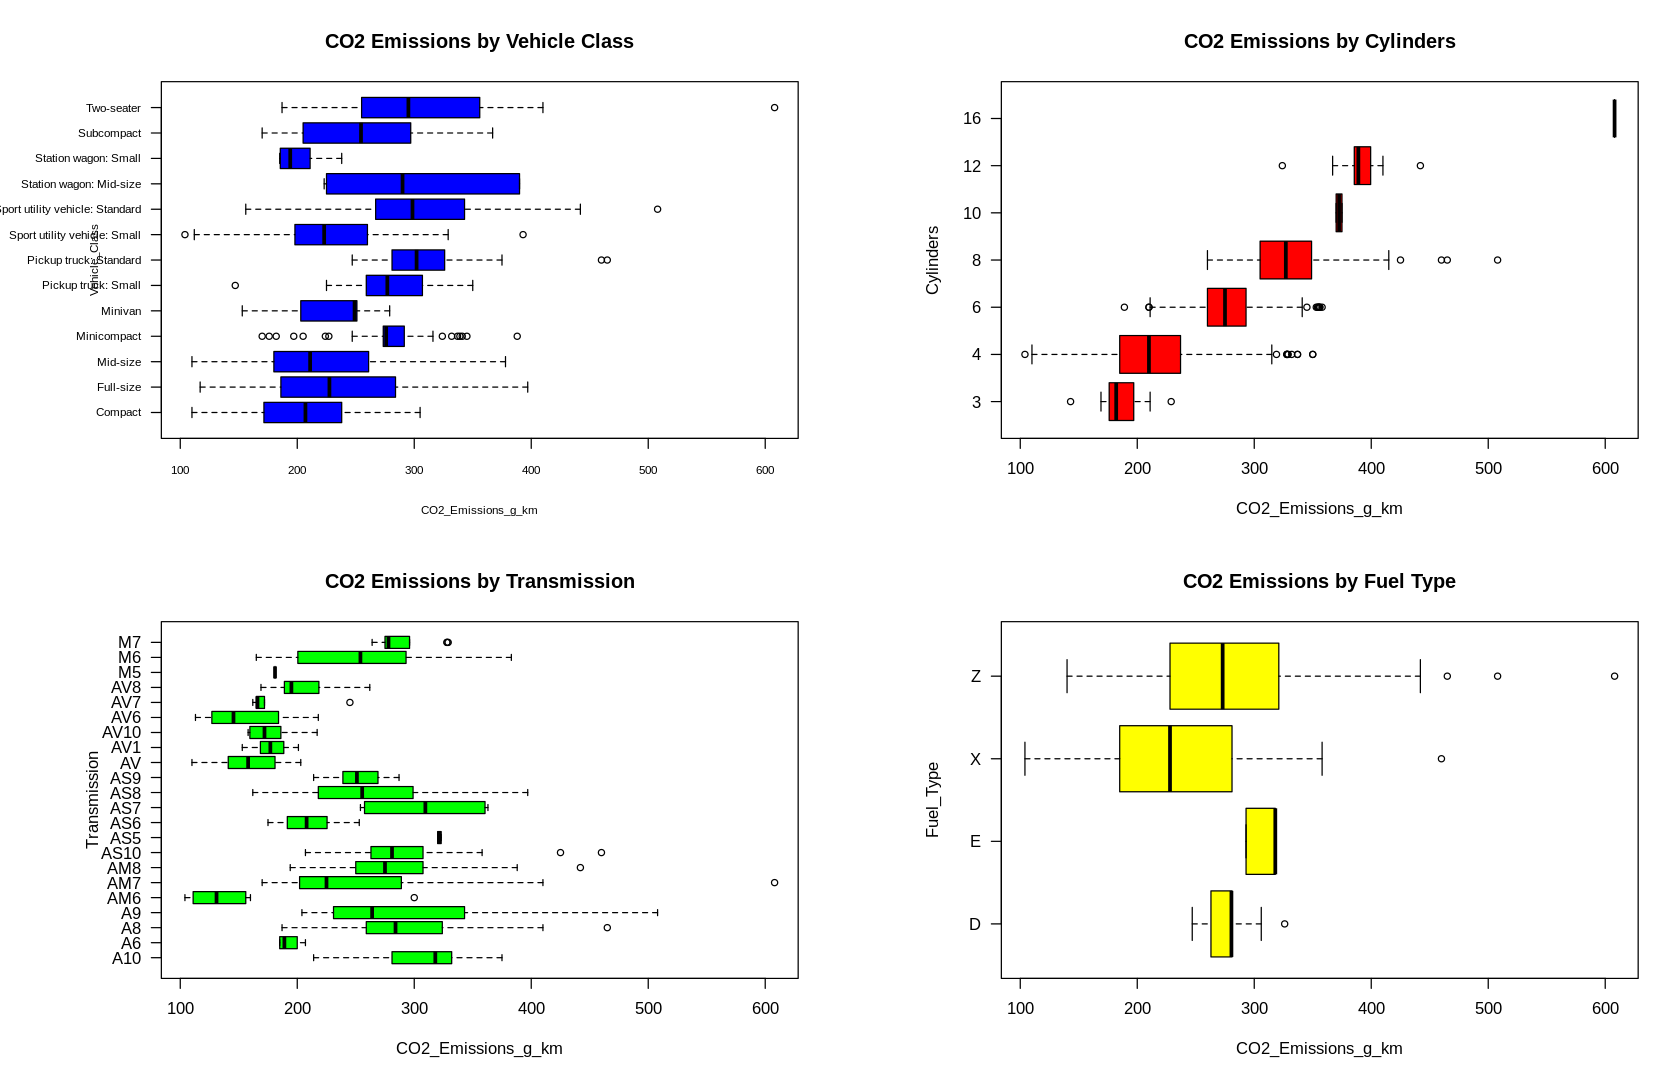

In [11]:
# Layout for box plots
par(mfrow=c(2,2), mar=c(5, 8, 4, 2) + 0.1)

# Box plot for Vehicle_Class vs CO2_Emissions_g_km
# boxplot(CO2_Emissions_g_km ~ Vehicle_Class, data=vehicle_emissions, main="CO2 Emissions by Vehicle Class", horizontal=TRUE, las=1, col="blue")

boxplot(CO2_Emissions_g_km ~ Vehicle_Class, data=vehicle_emissions, 
        main="CO2 Emissions by Vehicle Class", 
        horizontal=TRUE, las=1, col="blue", 
        cex.axis=0.7, # Scale down the text size for axis labels
        cex.lab=0.7, # Scale down the text size for axis title
        names.arg=sapply(vehicle_emissions$Vehicle_Class, function(x) substring(x, 1, 20)) # Shorten category names if needed
)

# Box plot for Cylinders vs CO2_Emissions_g_km
boxplot(CO2_Emissions_g_km ~ Cylinders, data=vehicle_emissions, main="CO2 Emissions by Cylinders", horizontal=TRUE, las=1, col="red")

# Box plot for Transmission vs CO2_Emissions_g_km
boxplot(CO2_Emissions_g_km ~ Transmission, data=vehicle_emissions, main="CO2 Emissions by Transmission", horizontal=TRUE, las=1, col="green")

# Box plot for Fuel_Type vs CO2_Emissions_g_km
boxplot(CO2_Emissions_g_km ~ Fuel_Type, data=vehicle_emissions, main="CO2 Emissions by Fuel Type", horizontal=TRUE, las=1, col="yellow")

# Reset the layout
par(mfrow=c(1,1), mar=c(5, 4, 4, 2) + 0.1)




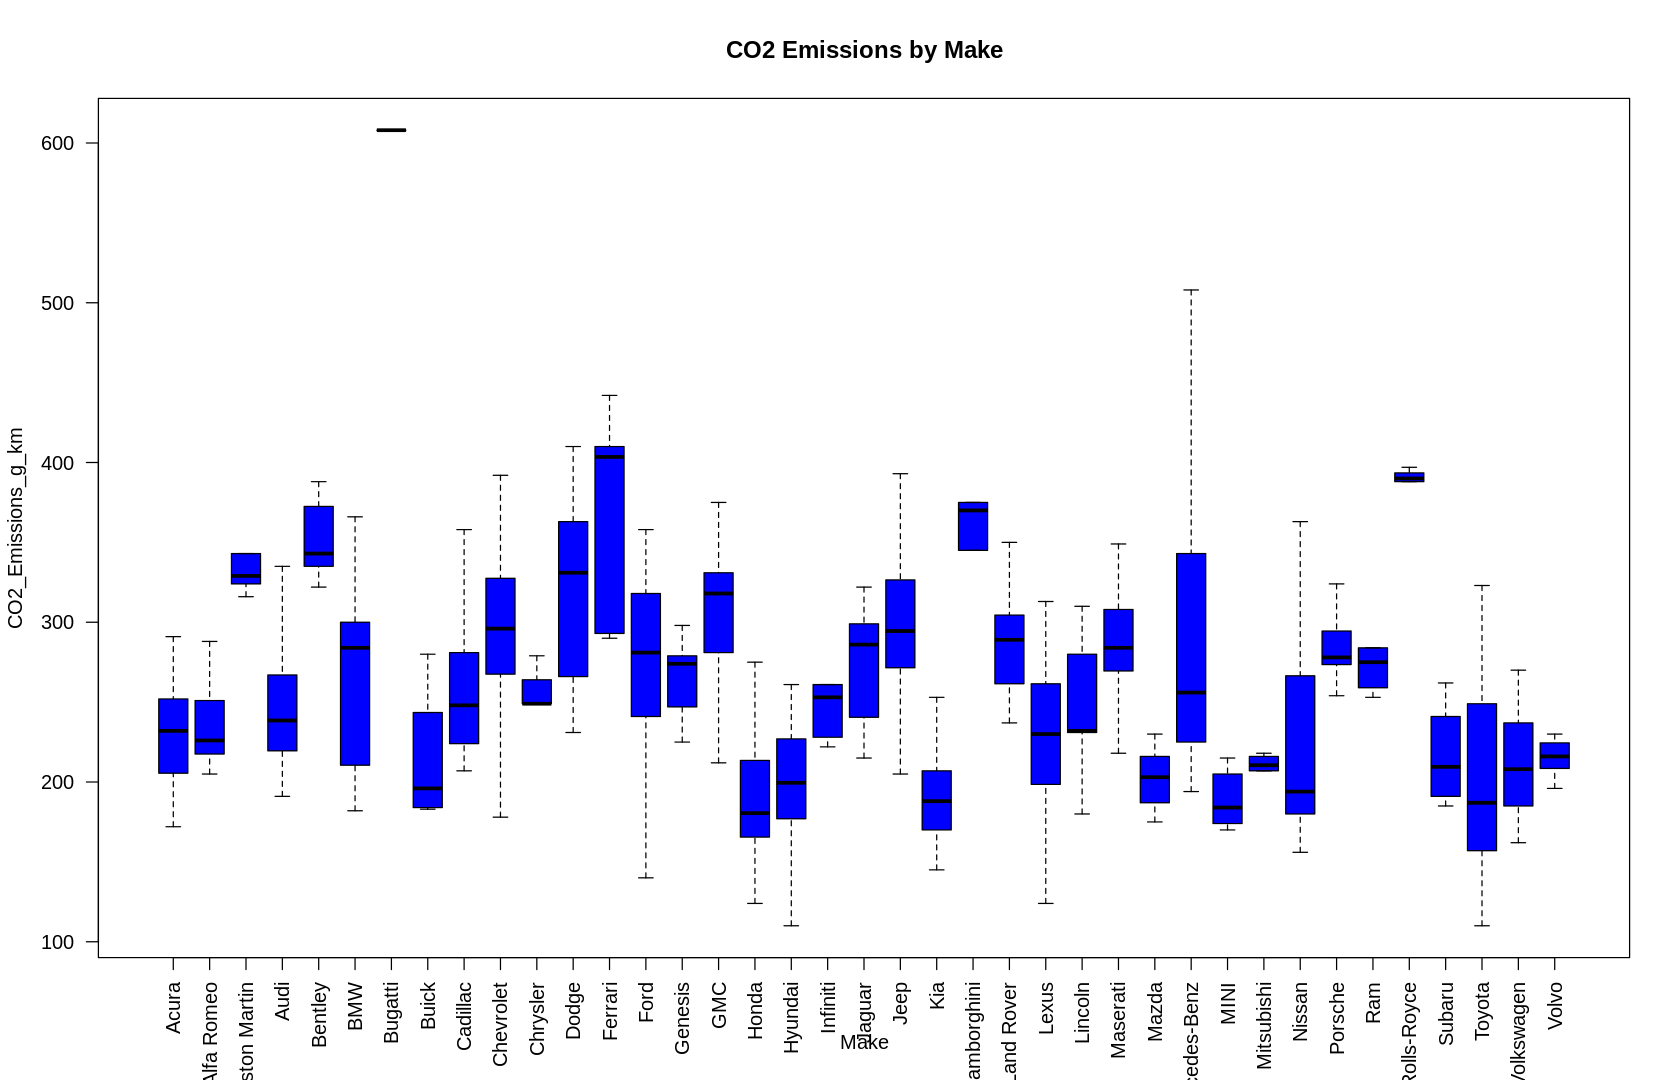

In [12]:
# Boxplot for Make only
boxplot(CO2_Emissions_g_km ~ Make, data=vehicle_emissions, main="CO2 Emissions by Make", las=2, col="blue", outline=FALSE)

## Still no real reason to exclude Make from model selection. Only reason so far: Some makes are well-represented with a higher number of vehicles, while others have very few. This could affect the model's ability to learn the impact of less common makes.

## SOLUTION: 
- For makes with low counts, consider grouping them into broader categories, such as "Other" or based on the market segment (luxury, sports, etc.), to avoid overfitting and ensure sufficient data for each category.
- Including "Make" increases the number of predictors and the complexity of the model. If the addition of "Make" significantly improves the model's performance, it may be justified. If the improvement is marginal, a simpler model may be preferable.

This might also be the case for Transmission and Vehicle Class, since there are a lot of dummy variables to consider. We said maybe turn Transmission to Manual and Automatic, but what about vehicle class and maybe cylinder?

# MODEL SELECTION

1. Decide if we want to do train-test split (if so, split the data first before any model fitting)
2. Start with simple model, then gradually add complexity
3. Use model selection (regsubsets) and add or remove variables based on criterion like Mallows Cp, adjR, AIC/BIC.
4. Evaluate model performance: Use R-squared and adjusted R-squared to evaluate how well our model explains the variation in the response variable. Calculate prediction error (RMSE) on a validation set or through cross-validation (if we do train-test split). If no split we can assess residuals and explain based on AIC and adjR.
5. Validate Assumptions: Check the assumptions of your regression model (linearity, independence, homoscedasticity, normality) using diagnostic plots and tests
6. Refine Model possibly based on diagnostics but hopefully we already pick a good model with no problems after step 2 and 3

### Start:
- Decided on no train-test split

- We are going to exclude City_L_100km and Highway_L_100km so we only use Combined_L_100km because of **multicollinearity** and we know that Combined_L_100km already represents the overall fuel consumption of the car.
- We will also exclude Model_Year since all the cars in the data are 2024 cars, and we will exclude Model since the data mostly consists of car models with one observation each, which can lead to overfitting since the model will learn noise specific to unique values instead of capturing the underlying pattern of the data to be able to generalize.
- Smog_Rating and CO2_Rating will also be removed because they are directly derived from and highly correlated with CO2 emissions, which is the response variable we are trying to predict

In [13]:
data <- select(vehicle_emissions, 
               -c(City_L_100km, Highway_L_100km, Model_Year, Model, Smog_Rating, CO2_Rating))
head(data)

Make,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Combined_L_100km,Combined_MPG,CO2_Emissions_g_km
<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
Acura,Full-size,1.5,4,AV7,Z,7.4,38,172
Acura,Full-size,1.5,4,M6,Z,7.8,36,181
Acura,Full-size,2.0,4,M6,Z,9.9,29,230
Acura,Sport utility vehicle: Small,3.5,6,AS10,Z,11.2,25,263
Acura,Sport utility vehicle: Standard,3.0,6,AS10,Z,12.4,23,291
Acura,Sport utility vehicle: Small,2.0,4,AS10,Z,9.9,29,232


- We then mutate the data so that Transmission only includes two categories "A" for automatic cars and "M" for manual cars.
- We will also mutate the Make variable so that it only has two categories as well. We do this by splitting the makes into Luxury and Non-Luxury based on the real-world market.

In [14]:
luxury_makes <- c("Acura", "Alfa Romeo", "Aston Martin", "Audi", "Bentley", "BMW", "Bugatti",
                  "Cadillac", "Ferrari", "Genesis", "Infiniti", "Jaguar", "Lamborghini",
                  "Land Rover", "Lexus", "Lincoln", "Maserati", "Mercedes-Benz", "Porsche",
                  "Rolls-Royce", "Volvo")

non_luxury_makes <- c("Buick", "Chevrolet", "Chrysler", "Dodge", "Ford", "GMC", "Honda", 
                      "Hyundai", "Jeep", "Kia", "Mazda", "MINI", "Nissan", "Ram", "Subaru", 
                      "Toyota", "Mitsubishi", "Volkswagen")

vehicle_emissions_mutated <- vehicle_emissions %>%
  select(-c(City_L_100km, Highway_L_100km, Model_Year, Model, Smog_Rating, CO2_Rating)) %>%
  mutate(Transmission = ifelse(grepl("A", Transmission), "A", 
                               ifelse(grepl("M", Transmission), "M", Transmission)),
         Make = ifelse(Make %in% luxury_makes, "Luxury", 
                       ifelse(Make %in% non_luxury_makes, "Non-Luxury", NA)))

head(vehicle_emissions_mutated)


Make,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Combined_L_100km,Combined_MPG,CO2_Emissions_g_km
<chr>,<fct>,<dbl>,<fct>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
Luxury,Full-size,1.5,4,A,Z,7.4,38,172
Luxury,Full-size,1.5,4,M,Z,7.8,36,181
Luxury,Full-size,2.0,4,M,Z,9.9,29,230
Luxury,Sport utility vehicle: Small,3.5,6,A,Z,11.2,25,263
Luxury,Sport utility vehicle: Standard,3.0,6,A,Z,12.4,23,291
Luxury,Sport utility vehicle: Small,2.0,4,A,Z,9.9,29,232


In [15]:
table(vehicle_emissions_mutated$Make)
table(vehicle_emissions_mutated$Transmission)


    Luxury Non-Luxury 
       342        397 


  A   M 
671  68 

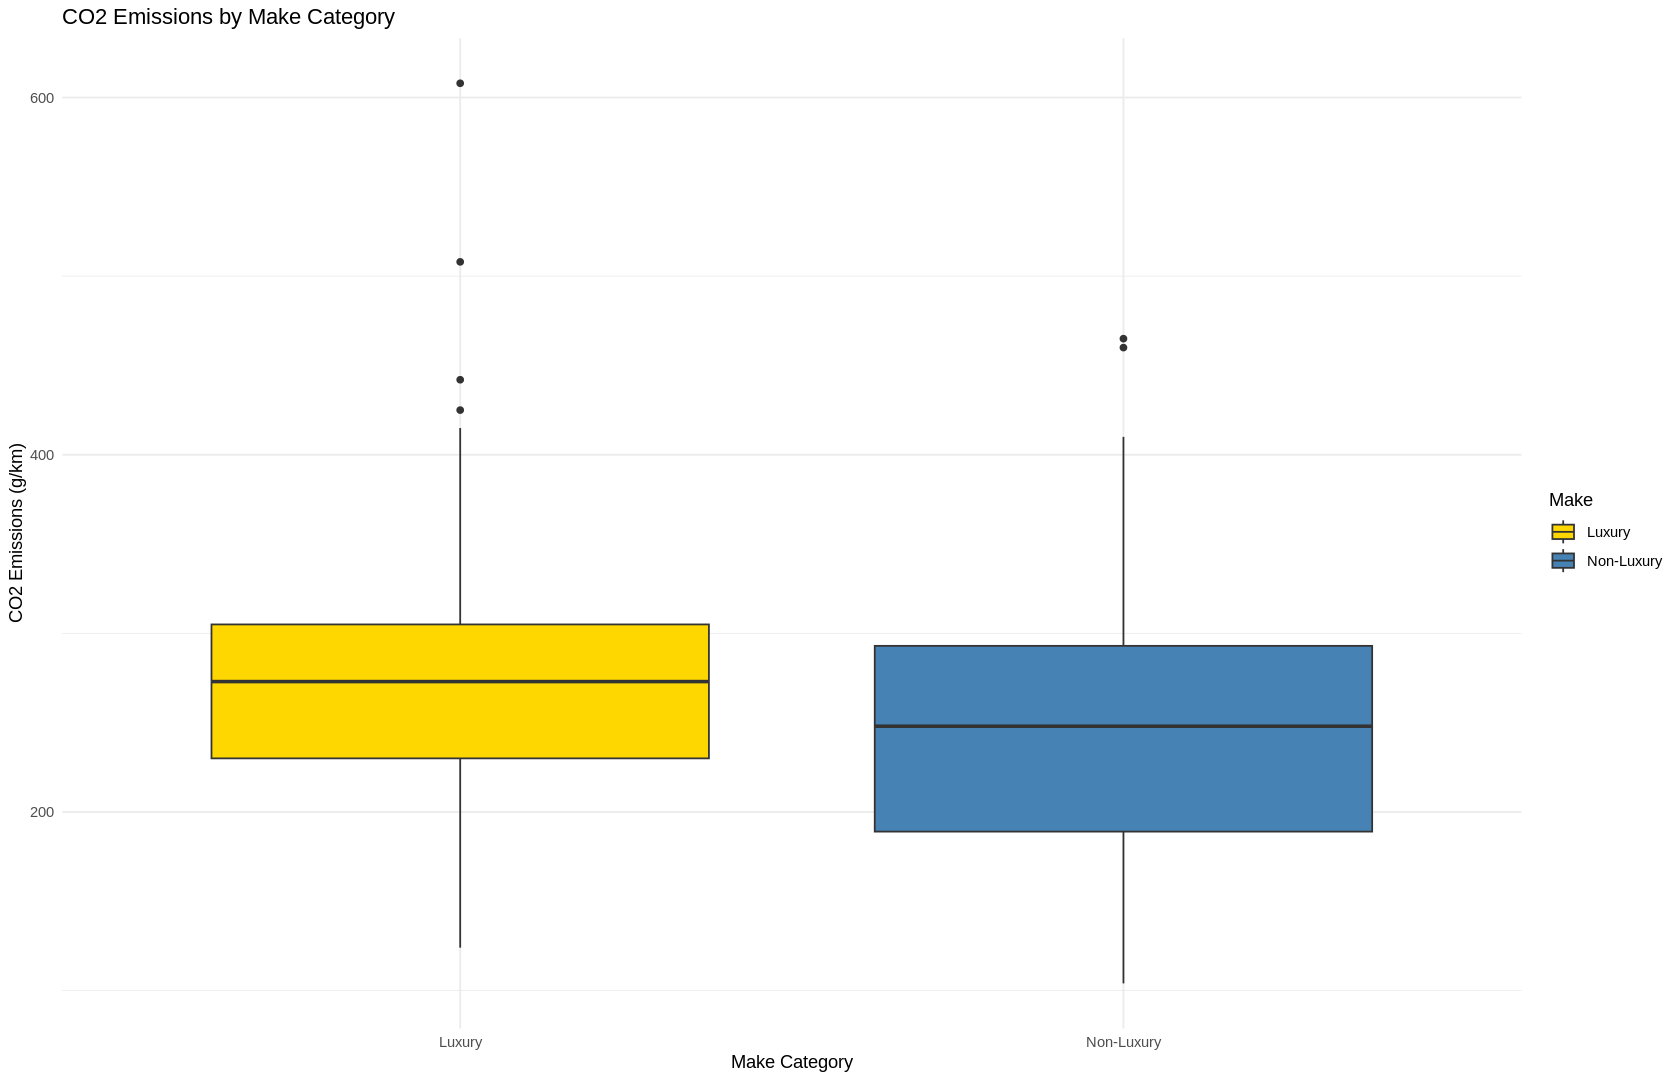

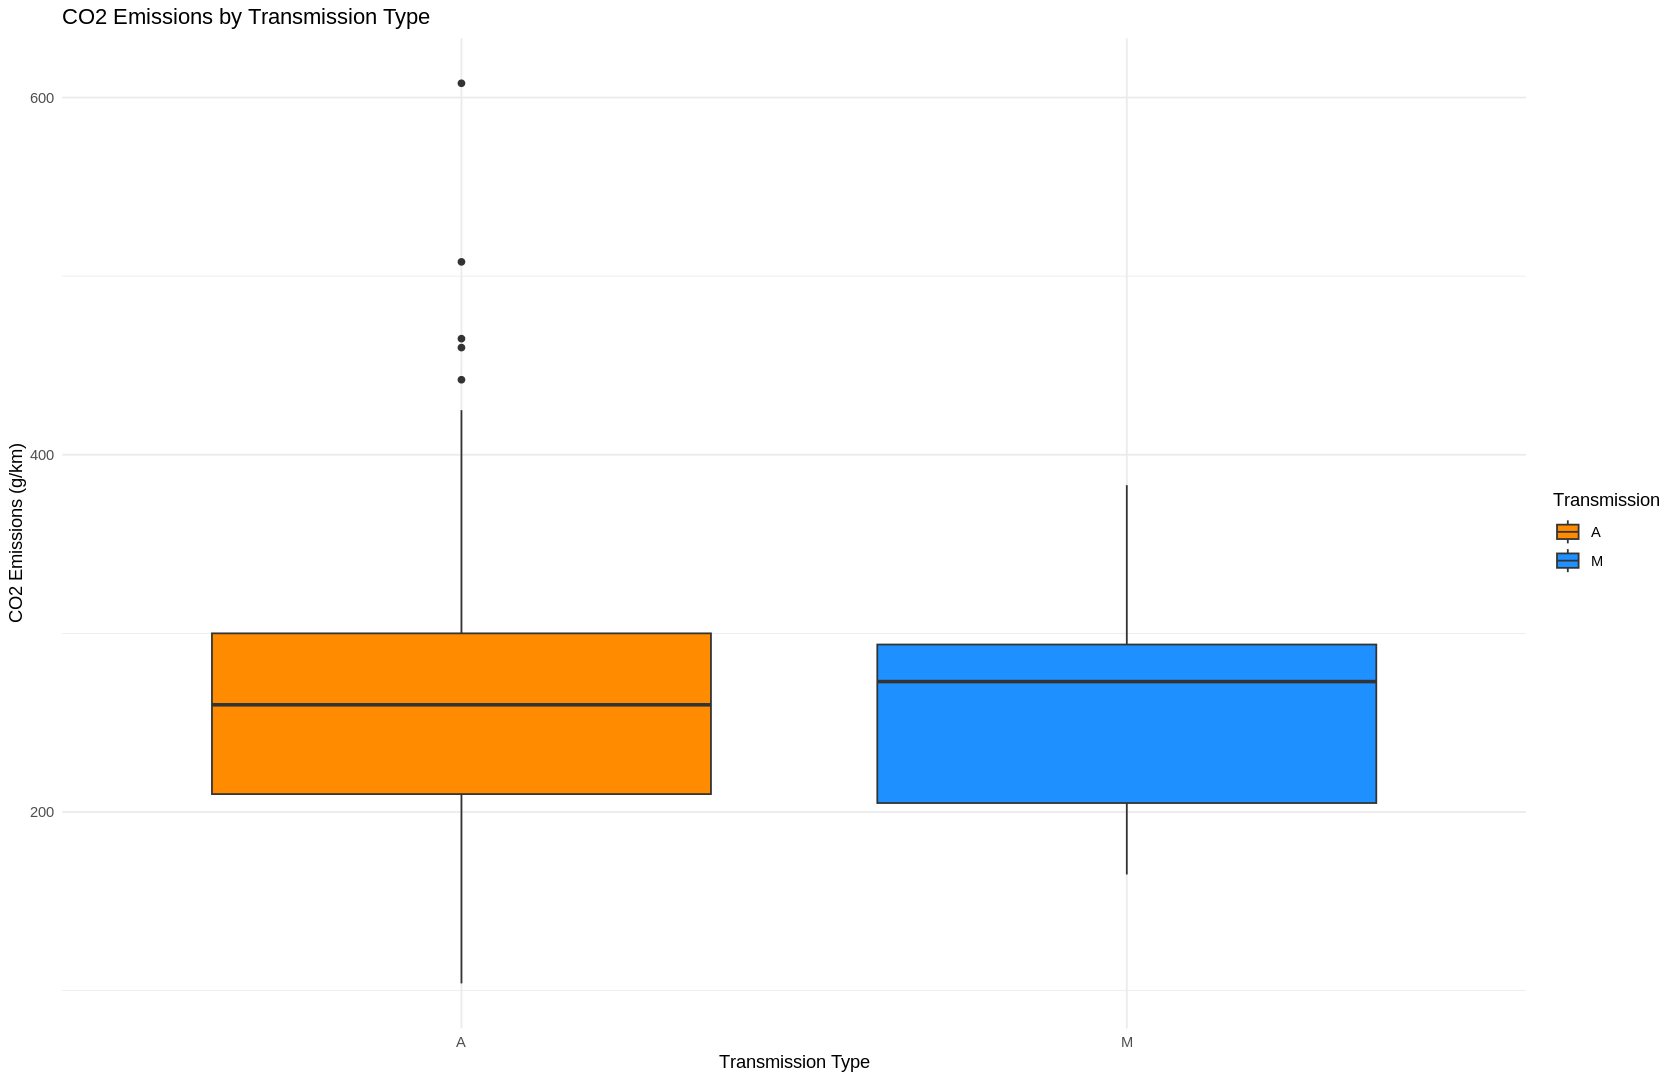

In [16]:
# Boxplot for Luxury vs Non-Luxury
ggplot(vehicle_emissions_mutated, aes(x = Make, y = CO2_Emissions_g_km, fill = Make)) +
  geom_boxplot() +
  labs(title = "CO2 Emissions by Make Category", x = "Make Category", y = "CO2 Emissions (g/km)") +
  scale_fill_manual(values = c("Luxury" = "gold", "Non-Luxury" = "steelblue")) +
  theme_minimal()

# Boxplot for A vs M Transmission Types
ggplot(vehicle_emissions_mutated, aes(x = Transmission, y = CO2_Emissions_g_km, fill = Transmission)) +
  geom_boxplot() +
  labs(title = "CO2 Emissions by Transmission Type", x = "Transmission Type", y = "CO2 Emissions (g/km)") +
  scale_fill_manual(values = c("A" = "darkorange", "M" = "dodgerblue")) +
  theme_minimal()


### We start with the full model becsuse we are planning to do stepwise selection afterwards. This will be the baseline that we compare other models with. 

In [17]:
full_model <- lm(formula = CO2_Emissions_g_km ~ ., data = vehicle_emissions_mutated)
summary(full_model)


Call:
lm(formula = CO2_Emissions_g_km ~ ., data = vehicle_emissions_mutated)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2351 -1.1172 -0.0785  0.9757  8.0805 

Coefficients:
                                               Estimate Std. Error  t value
(Intercept)                                   3.856e+01  1.734e+00   22.236
MakeNon-Luxury                               -6.738e-02  2.348e-01   -0.287
Vehicle_ClassFull-size                        6.632e-03  4.019e-01    0.017
Vehicle_ClassMid-size                         3.201e-01  3.210e-01    0.997
Vehicle_ClassMinicompact                      8.311e-01  3.815e-01    2.179
Vehicle_ClassMinivan                         -1.209e-01  7.250e-01   -0.167
Vehicle_ClassPickup truck: Small              4.923e-01  5.224e-01    0.942
Vehicle_ClassPickup truck: Standard           1.011e-01  3.924e-01    0.258
Vehicle_ClassSport utility vehicle: Small     3.612e-02  2.977e-01    0.121
Vehicle_ClassSport utility vehicle: Standard -2.325e-

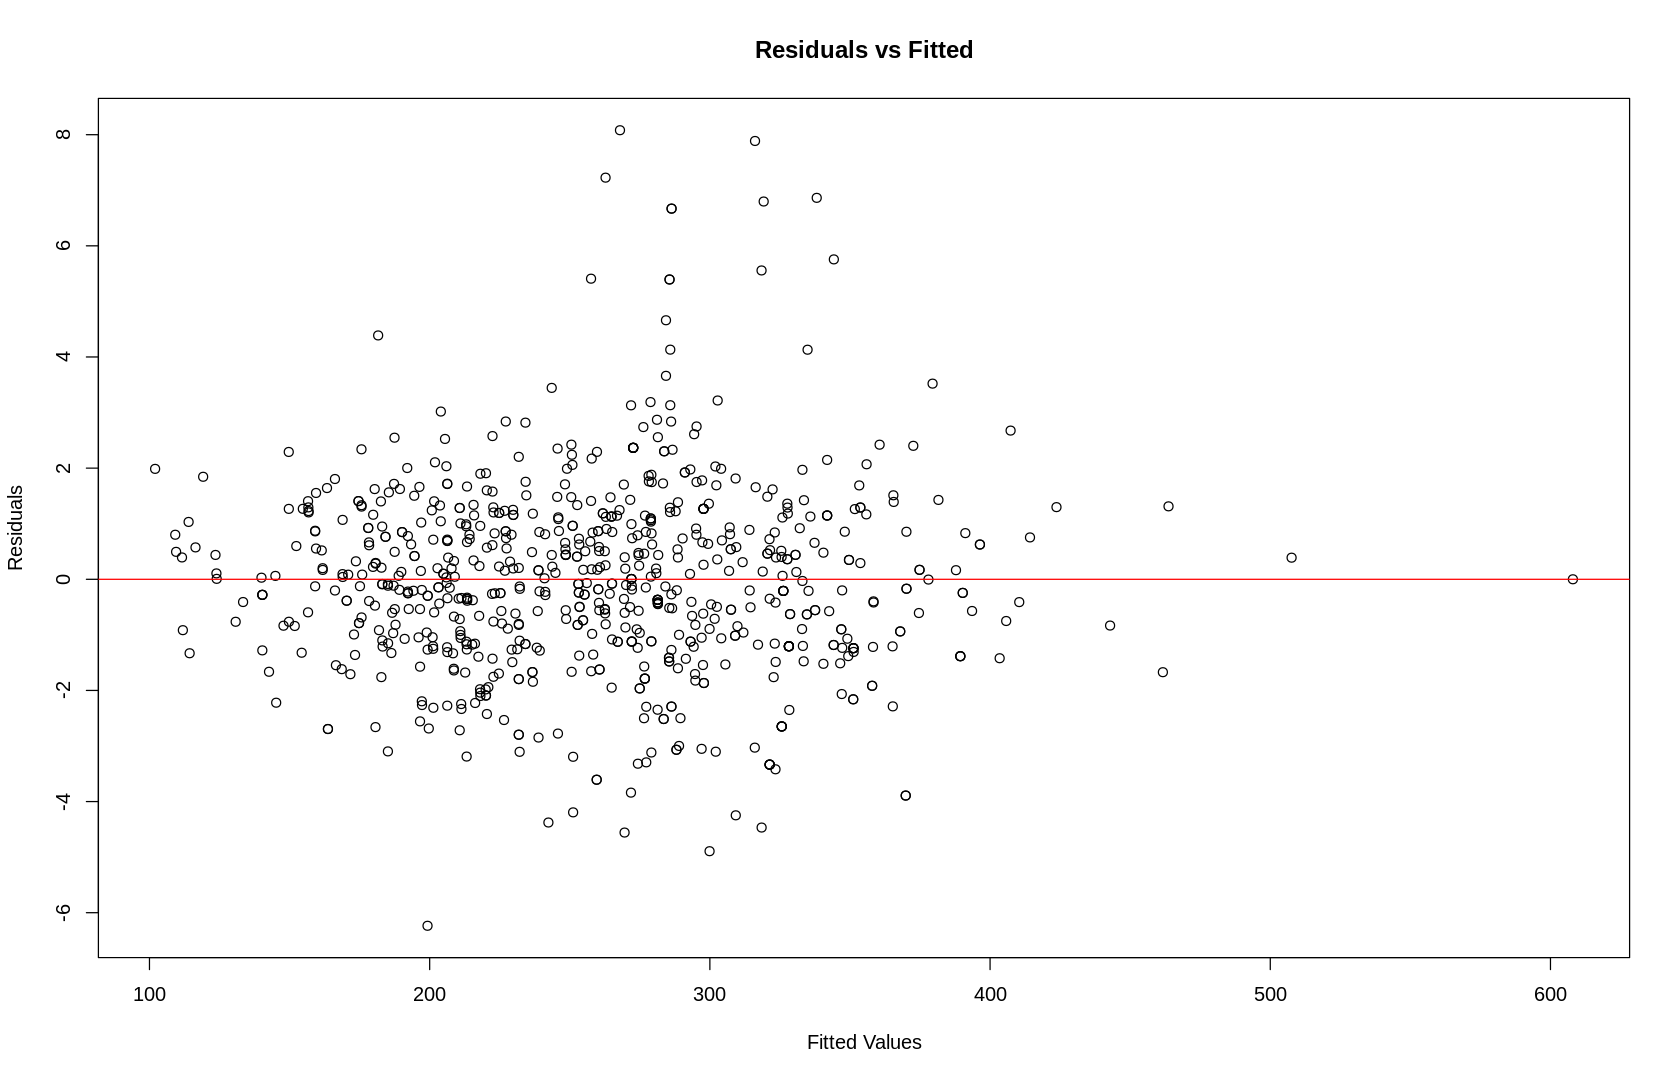

In [18]:
# Assuming you have a full model called full_model
full_model <- lm(CO2_Emissions_g_km ~ ., data = vehicle_emissions_mutated)

# Plot the residuals vs fitted values
plot(full_model$fitted.values, resid(full_model),
     xlab = "Fitted Values", ylab = "Residuals",
     main = "Residuals vs Fitted")

# Add a horizontal line at 0 for reference
abline(h = 0, col = "red")

In [19]:
vif_results <- vif(full_model)
print(vif_results)

                      GVIF Df GVIF^(1/(2*Df))
Make              3.328390  1        1.824388
Vehicle_Class     5.815752 12        1.076115
Engine_Size_L    10.587671  1        3.253870
Cylinders        25.284195  6        1.308893
Transmission      1.238536  1        1.112895
Fuel_Type         5.173076  3        1.315098
Combined_L_100km 16.683088  1        4.084494
Combined_MPG     10.856373  1        3.294901


In [20]:
aic <- AIC(full_model)
aic

[1] 2948.259

## Carrying out regsubsets since there are no multicollinearity problems and no linear model assumption violations so far.
- We don't do exhaustive because we have a high number of variables and exhaustive method looks through all possible models
- Forward selection might miss important predictors if their effects become apparent only after other variables are included in the model.
- Backward elimination might be less prone to overfitting compared to forward selection since it starts with the full model, but it can still retain If you start with a model that includes many variables, possibly too many, backward elimination helps by starting with the full set and removing the least useful predictors.

### Therefore I think backward selection is best

In [21]:
# Backward Elimination
backward_elimination <- regsubsets(CO2_Emissions_g_km ~ ., data = vehicle_emissions_mutated, method = "backward", nvmax = 15)
regsubsets_summary <- summary(backward_elimination)
regsubsets_summary

Subset selection object
Call: regsubsets.formula(CO2_Emissions_g_km ~ ., data = vehicle_emissions_mutated, 
    method = "backward", nvmax = 15)
26 Variables  (and intercept)
                                             Forced in Forced out
MakeNon-Luxury                                   FALSE      FALSE
Vehicle_ClassFull-size                           FALSE      FALSE
Vehicle_ClassMid-size                            FALSE      FALSE
Vehicle_ClassMinicompact                         FALSE      FALSE
Vehicle_ClassMinivan                             FALSE      FALSE
Vehicle_ClassPickup truck: Small                 FALSE      FALSE
Vehicle_ClassPickup truck: Standard              FALSE      FALSE
Vehicle_ClassSport utility vehicle: Small        FALSE      FALSE
Vehicle_ClassSport utility vehicle: Standard     FALSE      FALSE
Vehicle_ClassStation wagon: Mid-size             FALSE      FALSE
Vehicle_ClassStation wagon: Small                FALSE      FALSE
Vehicle_ClassSubcompact          

In [22]:
bic_values <- regsubsets_summary$bic
cp_values <- regsubsets_summary$cp
adjr2_values <- regsubsets_summary$adjr2

# Printing the values
print("BIC Values:")
print(bic_values)
print("Cp Values:")
print(cp_values)
print("Adjusted R-squared Values:")
print(adjr2_values)

[1] "BIC Values:"
 [1] -2418.045 -3566.280 -3584.708 -5285.320 -5292.308 -5295.253 -5295.773
 [8] -5295.172 -5294.265 -5292.763 -5289.770 -5285.553 -5281.665 -5276.871
[15] -5271.726
[1] "Cp Values:"
 [1] 37755.559435  7333.391938  7066.715386    44.877753    32.773704
 [6]    25.017704    19.821308    15.809870    12.150741     9.119315
[11]     7.578330     7.246875     6.602882     6.846465     7.433019
[1] "Adjusted R-squared Values:"
 [1] 0.9626928 0.9921710 0.9924215 0.9992468 0.9992596 0.9992681 0.9992741
 [8] 0.9992790 0.9992836 0.9992875 0.9992900 0.9992913 0.9992929 0.9992937
[15] 0.9992941


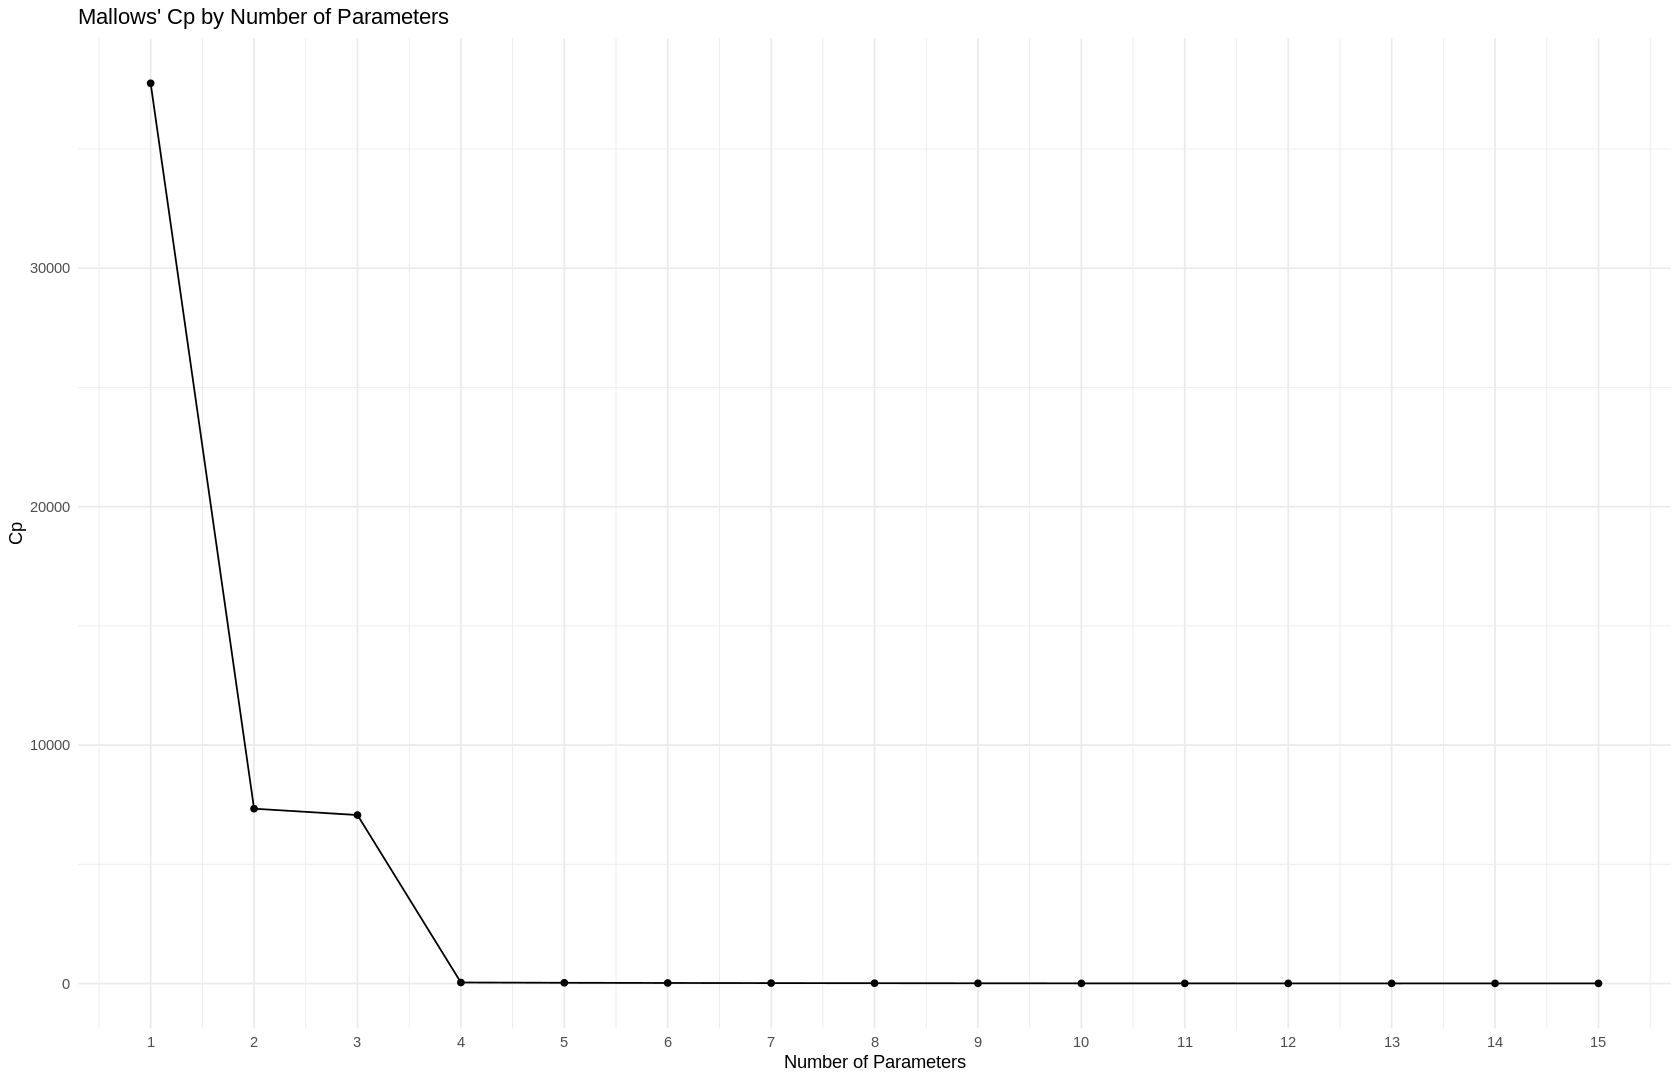

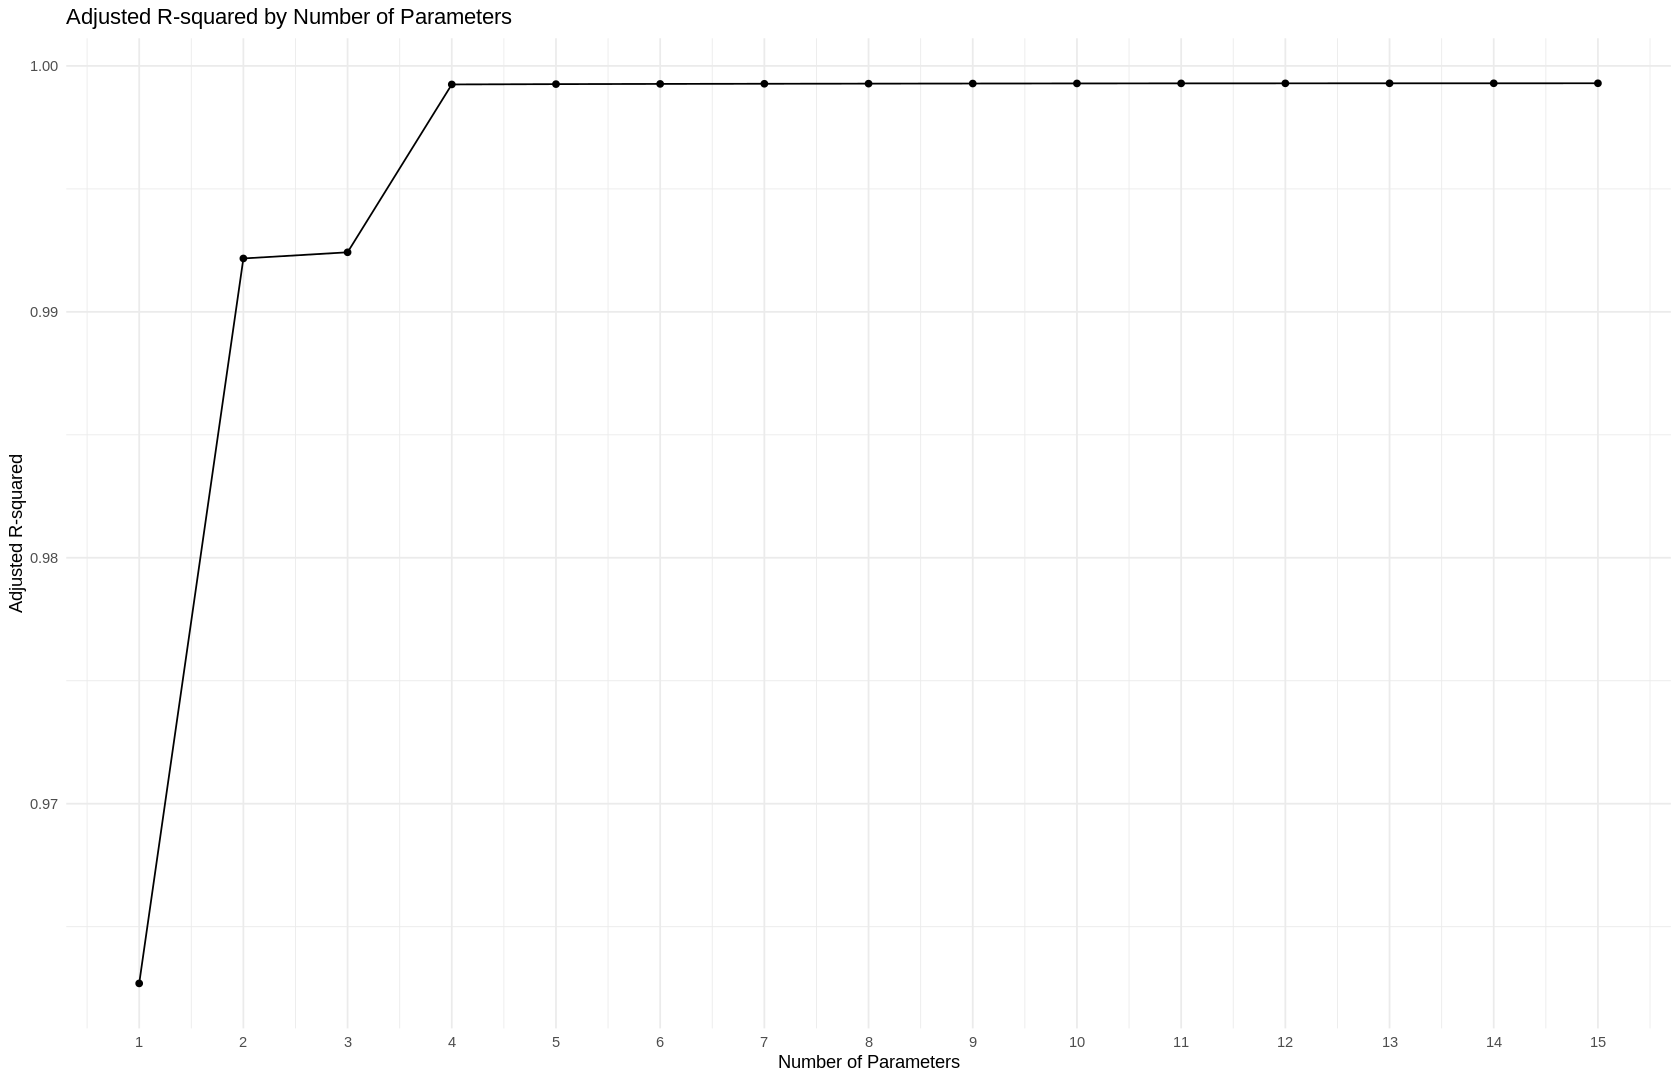

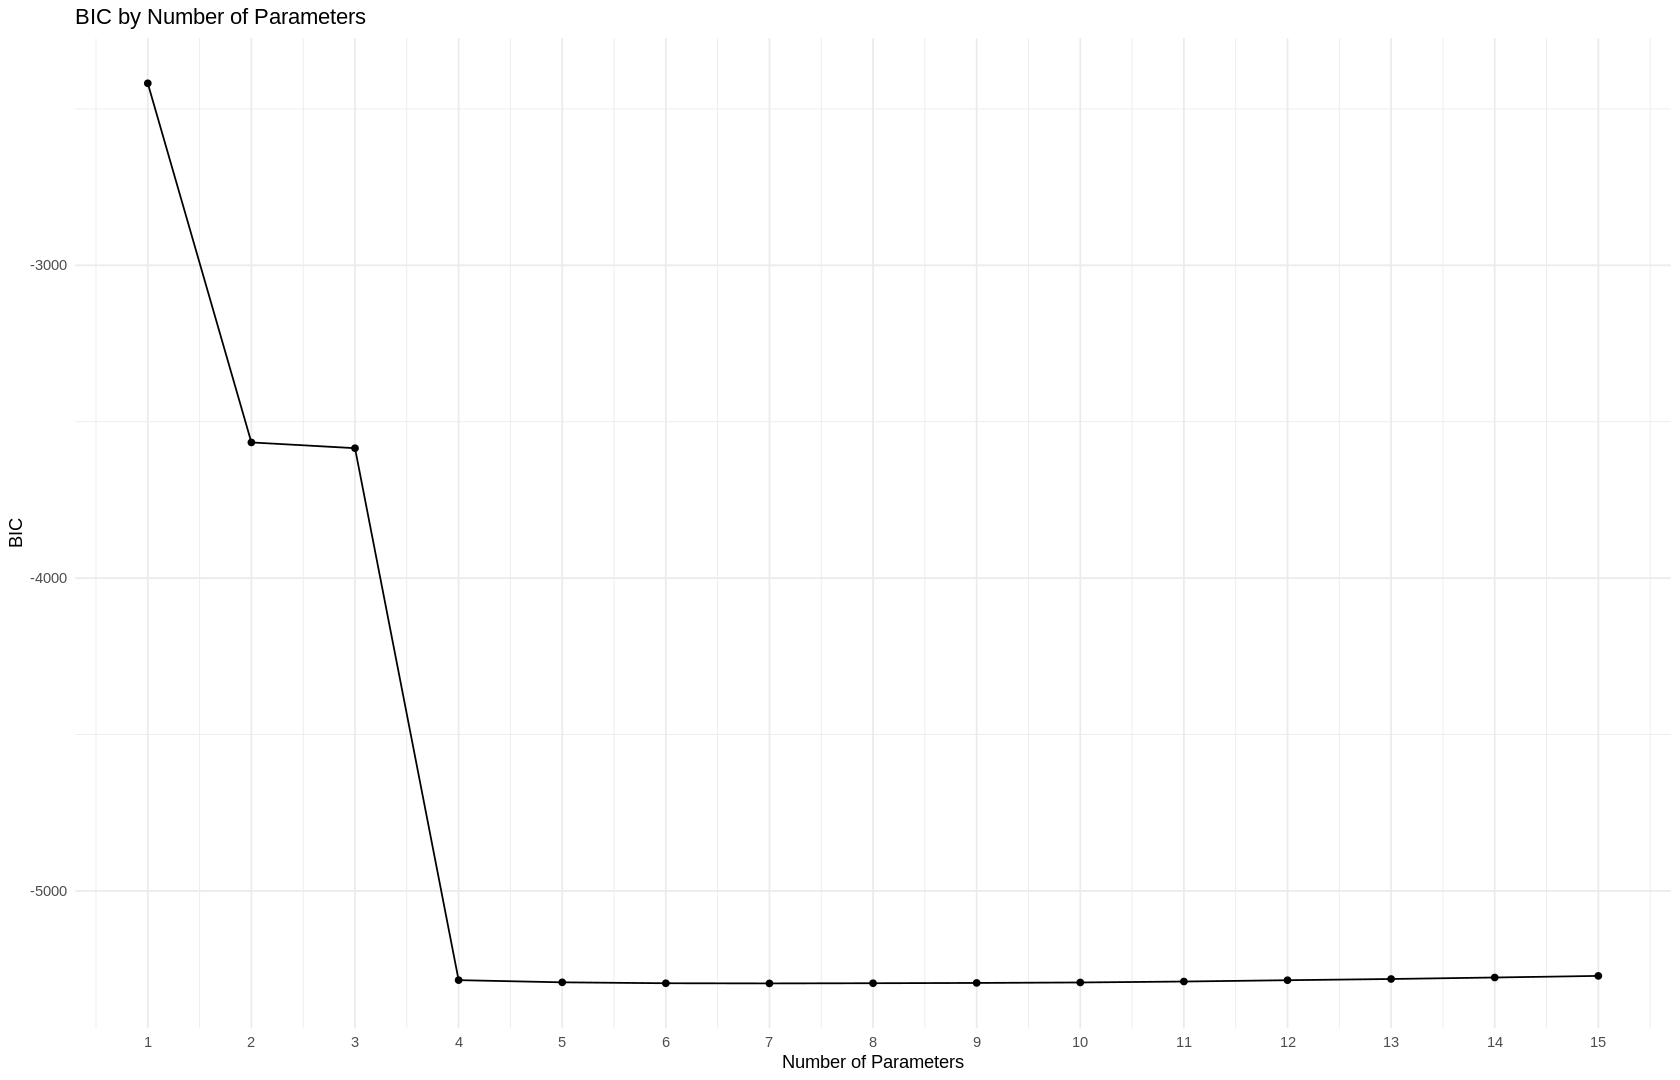

In [23]:
model_sizes <- seq_along(regsubsets_summary$cp)
plot_data <- data.frame(ModelSize = model_sizes, Cp = cp_values, AdjR2 = adjr2_values, BIC = bic_values)

# Plotting Cp values with integer x-axis margins
ggplot(plot_data, aes(x = ModelSize, y = Cp)) +
  geom_line() +
  geom_point() +
  theme_minimal() +
  ggtitle("Mallows' Cp by Number of Parameters") +
  xlab("Number of Parameters") +
  ylab("Cp") +
  scale_x_continuous(breaks = seq(min(plot_data$ModelSize), max(plot_data$ModelSize), by = 1))  # Integer breaks


# Plotting Adjusted R-squared values with integer x-axis margins
ggplot(plot_data, aes(x = ModelSize, y = AdjR2)) +
  geom_line() +
  geom_point() +
  theme_minimal() +
  ggtitle("Adjusted R-squared by Number of Parameters") +
  xlab("Number of Parameters") +
  ylab("Adjusted R-squared") +
  scale_x_continuous(breaks = seq(min(plot_data$ModelSize), max(plot_data$ModelSize), by = 1))  # Integer breaks


# Plotting BIC values with integer x-axis margins
ggplot(plot_data, aes(x = ModelSize, y = BIC)) +
  geom_line() +
  geom_point() +
  theme_minimal() +
  ggtitle("BIC by Number of Parameters") +
  xlab("Number of Parameters") +
  ylab("BIC") +
  scale_x_continuous(breaks = seq(min(plot_data$ModelSize), max(plot_data$ModelSize), by = 1))  # Integer breaks


## We choose model with 10 parameters because it has Mallows' Cp value that is closest to the number of parameters(10) compared to any other model. This suggests that it has the best balance between over and underfitting. It also has a very high adjR value, and relative to other models the BIC value is one of the lowest, although it doesn't change much from 4 parameters onwards. Lower BIC values indicate superior model performance, aligning with the Bayesian principle that simpler models explaining the data are more probable

### Fitting Model with 10 parameters

In [24]:
# Fitting the model with the specified variables
Cylinders_10 <- factor(vehicle_emissions_mutated$Cylinders=='10')
Cylinders_12 <- factor(vehicle_emissions_mutated$Cylinders=='12')
Vehicle_Class_StationSmall <- factor(vehicle_emissions_mutated$Vehicle_Class=='Station wagon: Small')
Vehicle_Class_Minicompact <- factor(vehicle_emissions_mutated$Vehicle_Class=='Minicompact')

model_10 <- lm(CO2_Emissions_g_km ~ Fuel_Type + Combined_L_100km + 
                Combined_MPG + Cylinders_10 + Cylinders_12 + Transmission + 
                Vehicle_Class_StationSmall + Vehicle_Class_Minicompact, 
                data = vehicle_emissions_mutated)

summary(model_10)



Call:
lm(formula = CO2_Emissions_g_km ~ Fuel_Type + Combined_L_100km + 
    Combined_MPG + Cylinders_10 + Cylinders_12 + Transmission + 
    Vehicle_Class_StationSmall + Vehicle_Class_Minicompact, data = vehicle_emissions_mutated)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3757 -1.0711  0.0207  0.9837  8.0770 

Coefficients:
                                 Estimate Std. Error  t value Pr(>|t|)    
(Intercept)                      38.62318    1.38257   27.936  < 2e-16 ***
Fuel_TypeE                     -163.60604    0.88028 -185.857  < 2e-16 ***
Fuel_TypeX                      -35.20874    0.42571  -82.706  < 2e-16 ***
Fuel_TypeZ                      -35.61316    0.42490  -83.816  < 2e-16 ***
Combined_L_100km                 23.29390    0.06726  346.334  < 2e-16 ***
Combined_MPG                     -0.06172    0.02368   -2.606  0.00934 ** 
Cylinders_10TRUE                 -2.10141    0.88917   -2.363  0.01837 *  
Cylinders_12TRUE                 -1.52792    0.47855   -3.1

In [25]:
# Calculating AIC
aic_value <- AIC(model_10)

# Calculating BIC
bic_value <- BIC(model_10)

# Printing the AIC and BIC values
print(paste("AIC:", aic_value))
print(paste("BIC:", bic_value))


[1] "AIC: 2930.77076345948"
[1] "BIC: 2986.03433851086"


### BIC is generally larger than AIC because it includes a higher penalty for the number of parameters in the model, especially when the sample size is large. This is why BIC tends to favor simpler models than AIC. BIC is designed to discourage the selection of overly complex models by directly penalizing models with more parameters, thus often favoring simpler models that still adequately fit the data.

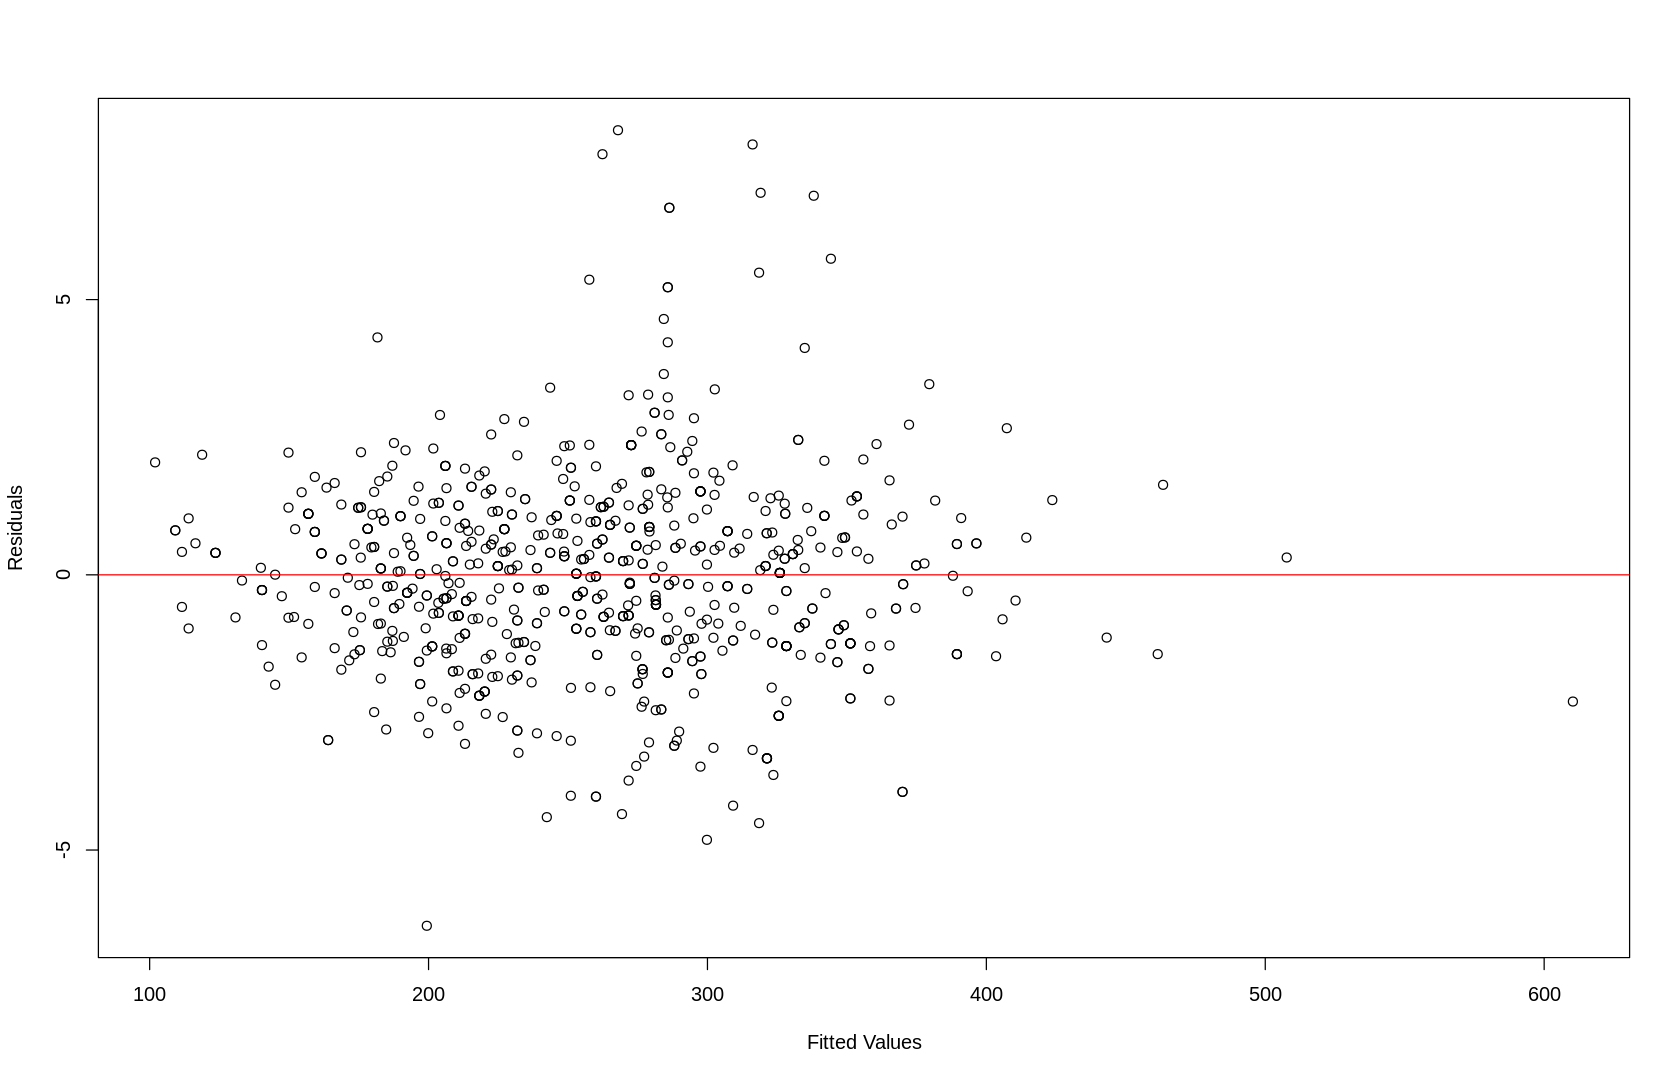

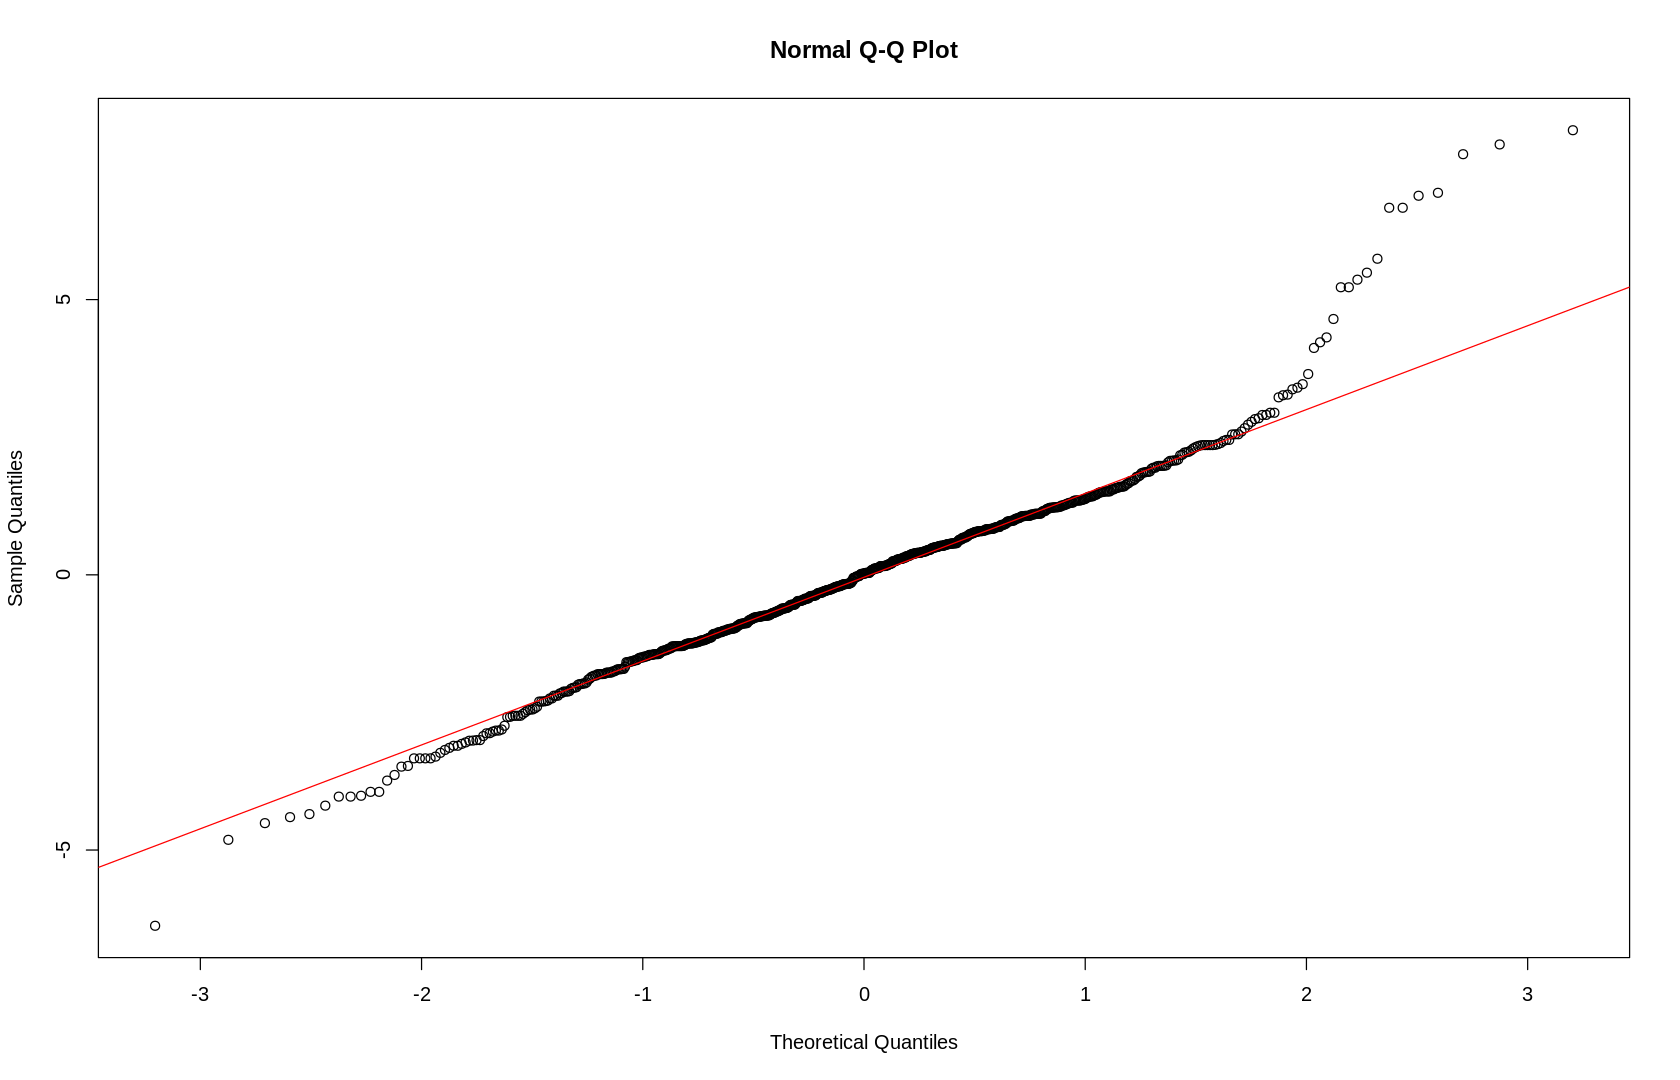

In [26]:
# Residuals vs Fitted
plot(model_10$fitted.values, resid(model_10), xlab="Fitted Values", ylab="Residuals")
abline(h=0, col="red")

# Normal Q-Q Plot
qqnorm(resid(model_10))
qqline(resid(model_10), col="red")

### Normal Q-Q Plot:
- The Q-Q plot shows some deviation from the line at both ends of the distribution, suggesting that the **residuals may not follow a normal distribution**. This could be due to **outliers, heavy tails, or skewness in the data**. Robust regression methods or transformation of response and/or predictors could be considered.

### Residual Plot:
- This plot does not show a clear systematic pattern, suggesting that the model's linearity assumption may not be severely violated. However, the spread of residuals appears to increase slightly with the fitted values, indicating **potential heteroscedasticity**. You might consider using heteroscedasticity-consistent standard errors or transforming the data.

# Dealing with potential heteroscedasticity and non-normal residuals

In [27]:
model_interactions <- lm(CO2_Emissions_g_km ~ Fuel_Type + Vehicle_Class_StationSmall + Vehicle_Class_Minicompact +
                         Cylinders_10 + Transmission +
                         Cylinders_12 * Transmission +
                         Combined_MPG * Vehicle_Class_StationSmall + Combined_MPG +
                         Combined_L_100km, 
                         data = vehicle_emissions_mutated)

summary(model_interactions)



Call:
lm(formula = CO2_Emissions_g_km ~ Fuel_Type + Vehicle_Class_StationSmall + 
    Vehicle_Class_Minicompact + Cylinders_10 + Transmission + 
    Cylinders_12 * Transmission + Combined_MPG * Vehicle_Class_StationSmall + 
    Combined_MPG + Combined_L_100km, data = vehicle_emissions_mutated)

Residuals:
   Min     1Q Median     3Q    Max 
-6.361 -1.093  0.031  1.002  8.045 

Coefficients:
                                              Estimate Std. Error  t value
(Intercept)                                   38.64296    1.37415   28.121
Fuel_TypeE                                  -163.60845    0.87481 -187.023
Fuel_TypeX                                   -35.22175    0.42311  -83.246
Fuel_TypeZ                                   -35.59042    0.42232  -84.274
Vehicle_Class_StationSmallTRUE               -16.87951    6.03139   -2.799
Vehicle_Class_MinicompactTRUE                  0.91379    0.27478    3.325
Cylinders_10TRUE                              -2.12646    0.88366   -2.406
Trans

16  19 112 167 170 177 180 183 186 193 286 289 294 297 300 303 405 410 426 447 
 16  19 112 167 170 177 180 183 186 193 286 289 294 297 300 303 405 410 426 447 
510 547 595 605 606 607 608 620 622 626 630 657 
510 547 595 605 606 607 608 620 622 626 630 657

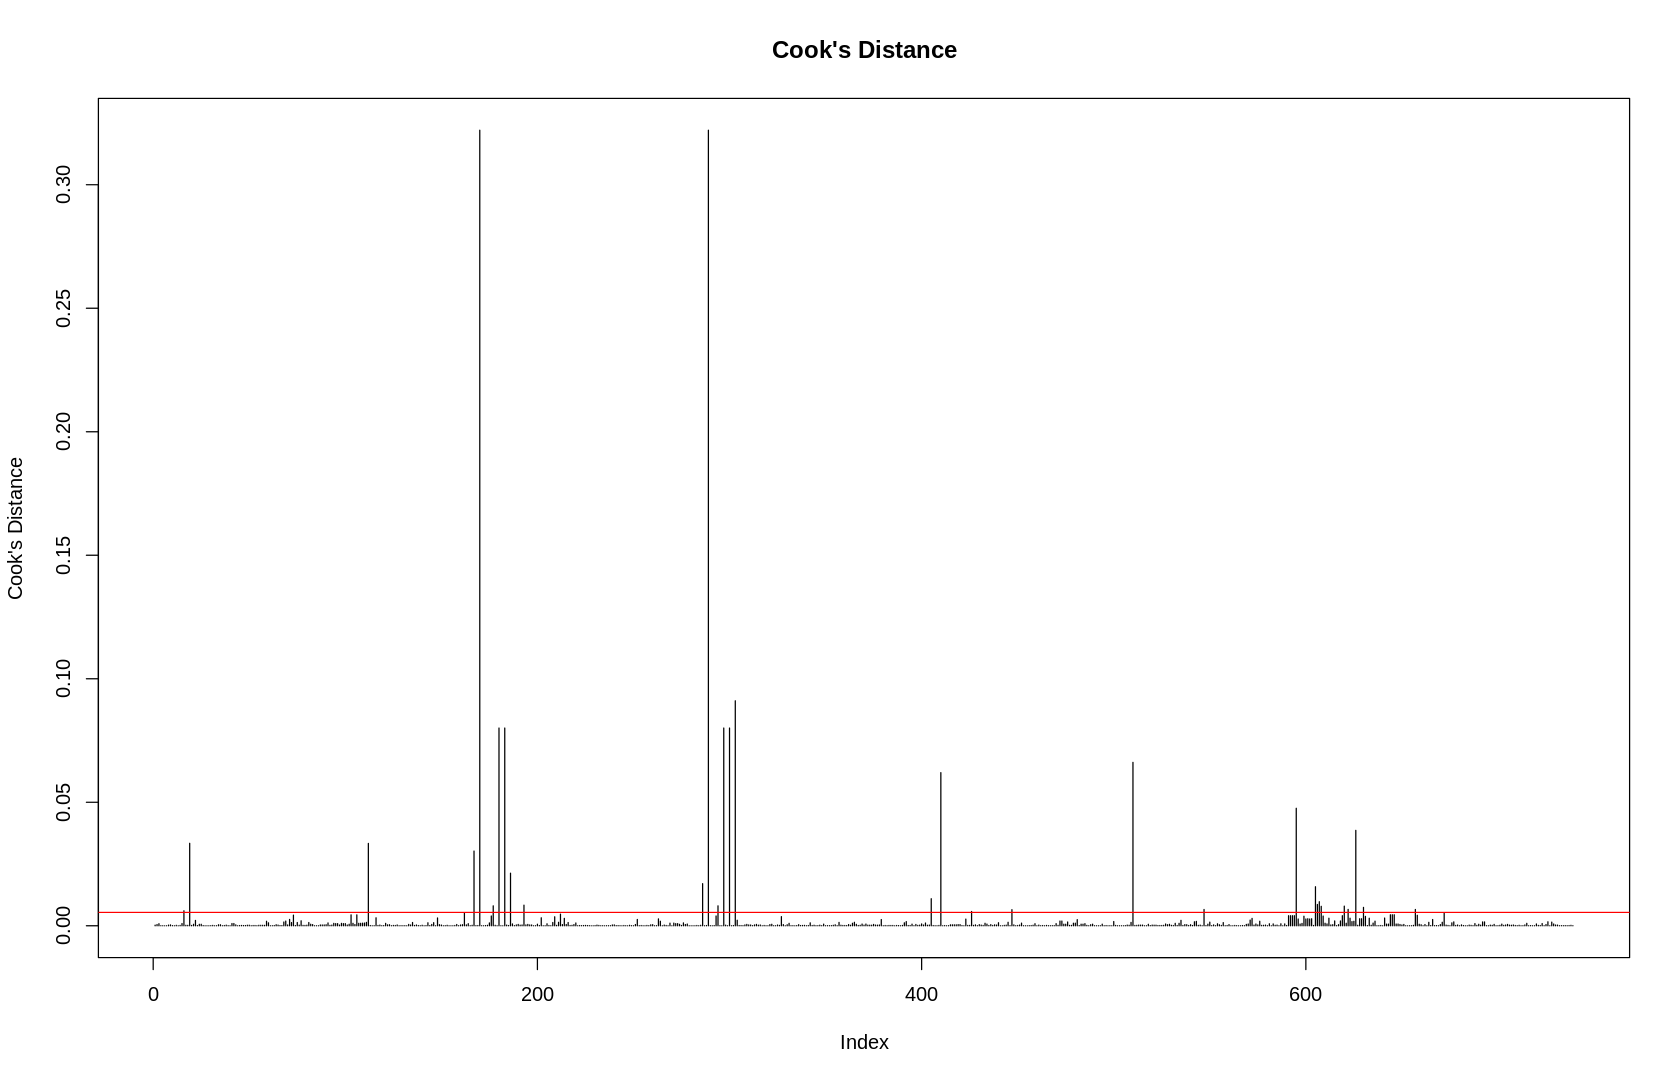

Make,Vehicle_Class,Engine_Size_L,Cylinders,Transmission,Fuel_Type,Combined_L_100km,Combined_MPG,CO2_Emissions_g_km
<chr>,<fct>,<dbl>,<fct>,<chr>,<fct>,<dbl>,<dbl>,<dbl>
Luxury,Minicompact,5.2,12,A,Z,13.8,20,324
Luxury,Two-seater,5.2,12,M,Z,16.3,17,383
Luxury,Two-seater,8.0,16,A,Z,26.1,11,608
Non-Luxury,Pickup truck: Standard,3.0,6,A,D,9.2,31,247
Non-Luxury,Pickup truck: Standard,5.3,8,A,E,17.7,16,293
Non-Luxury,Pickup truck: Standard,3.0,6,A,D,10.9,26,293
Non-Luxury,Pickup truck: Standard,5.3,8,A,E,19.2,15,318
Non-Luxury,Pickup truck: Standard,5.3,8,A,E,19.2,15,318
Non-Luxury,Pickup truck: Standard,3.0,6,A,D,11.4,25,306


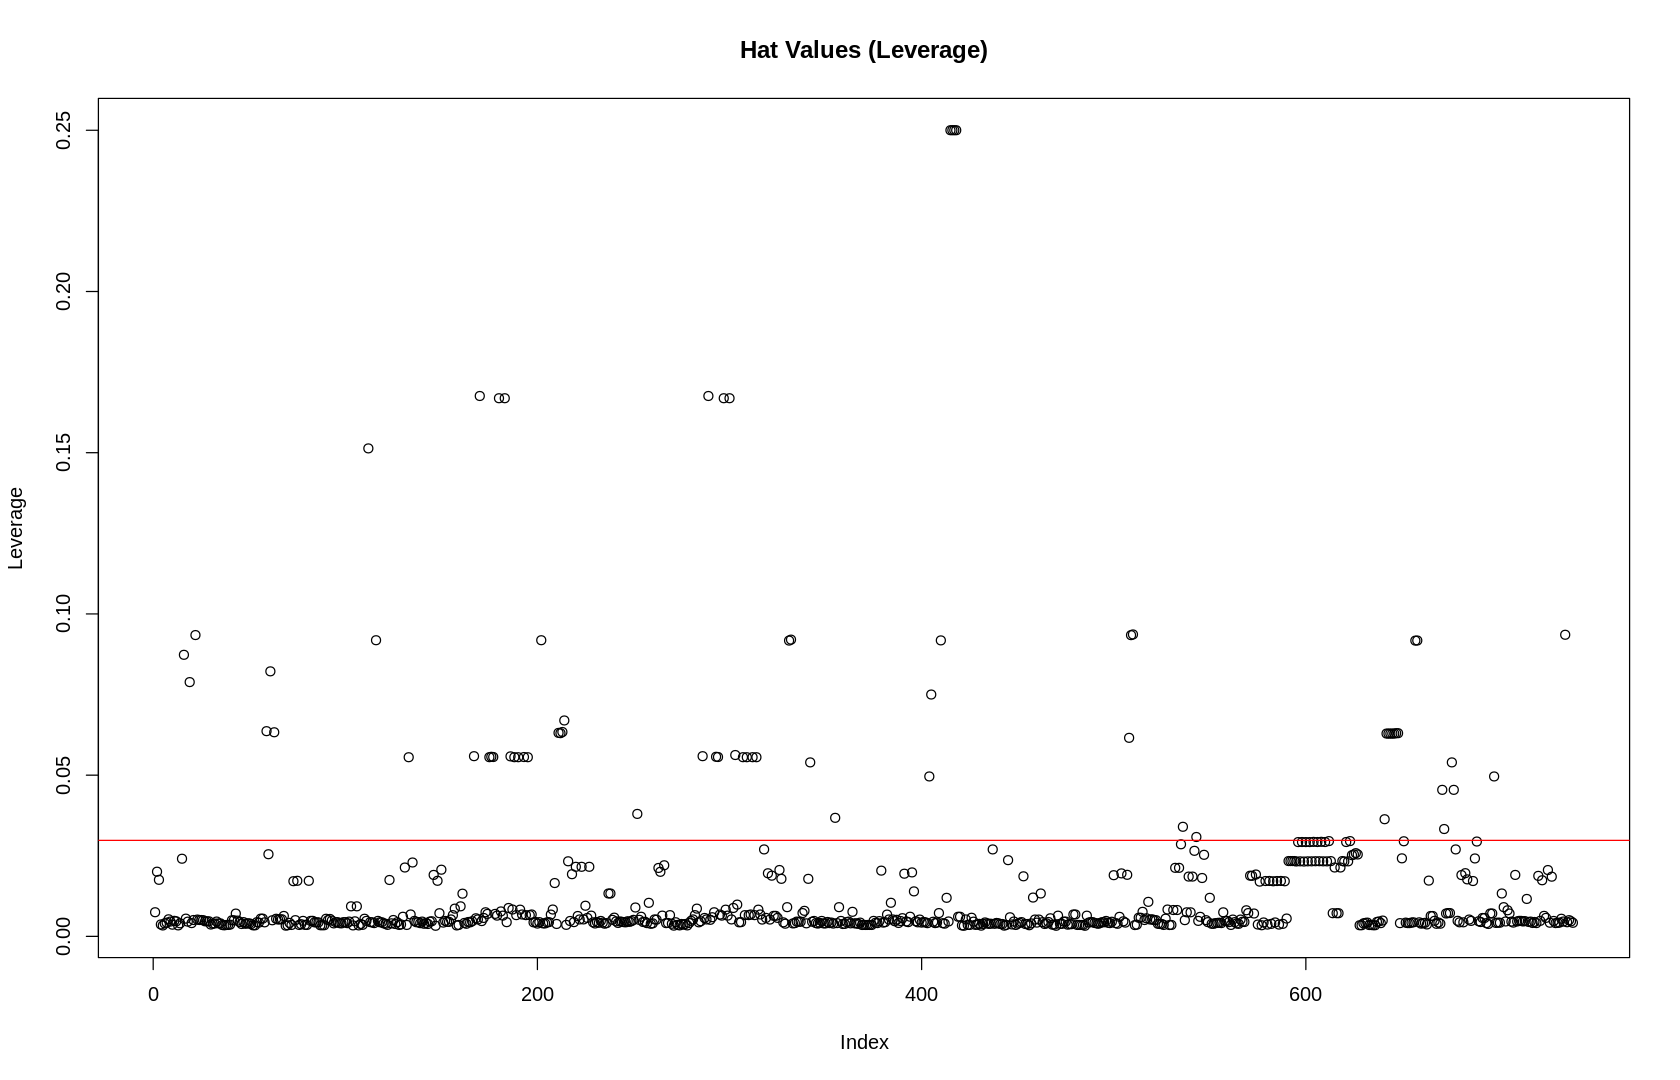

In [28]:
# Calculate Cook's distance for model_10
cooks_dist <- cooks.distance(model_10)

# Plot Cook's distance
plot(cooks_dist, type="h", main="Cook's Distance", ylab="Cook's Distance")
abline(h = 4/length(cooks_dist), col = "red")  # Rule of thumb threshold line

# Identify points with high Cook's distance
influential_points <- which(cooks_dist > (4/length(cooks_dist)))
influential_points

# Plot leverage values
plot(hatvalues(model_10), main="Hat Values (Leverage)", ylab="Leverage")
abline(h = 2*mean(hatvalues(model_10)), col="red") 

# Calculate standardized residuals
std_resid <- rstandard(model_10)
large_std_resid_points <- which(abs(std_resid) > 2)

# Combine points identified by both criteria
all_influential_points <- union(influential_points, large_std_resid_points)
vehicle_emissions_mutated[all_influential_points, ]
cleaned_data <- vehicle_emissions_mutated[-all_influential_points, ]


In [29]:
# Refit the model with cleaned data
cleaned_data$Cylinders_10 <- factor(cleaned_data$Cylinders == '10')
cleaned_data$Cylinders_12 <- factor(cleaned_data$Cylinders == '12')
cleaned_data$Vehicle_Class_StationSmall <- factor(cleaned_data$Vehicle_Class == 'Station wagon: Small')
cleaned_data$Vehicle_Class_Minicompact <- factor(cleaned_data$Vehicle_Class == 'Minicompact')

model_10_clean <- lm(CO2_Emissions_g_km ~ Fuel_Type + Combined_L_100km + 
                     Combined_MPG + Cylinders_10 + Cylinders_12 + Transmission + 
                     Vehicle_Class_StationSmall + Vehicle_Class_Minicompact, 
                     data = cleaned_data)

summary(model_10_clean)



Call:
lm(formula = CO2_Emissions_g_km ~ Fuel_Type + Combined_L_100km + 
    Combined_MPG + Cylinders_10 + Cylinders_12 + Transmission + 
    Vehicle_Class_StationSmall + Vehicle_Class_Minicompact, data = cleaned_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4659 -0.9435  0.0434  0.9162  3.4386 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                     37.41017    1.18909  31.461  < 2e-16 ***
Fuel_TypeX                     -34.74172    0.40819 -85.113  < 2e-16 ***
Fuel_TypeZ                     -35.16670    0.40792 -86.210  < 2e-16 ***
Combined_L_100km                23.33183    0.05751 405.706  < 2e-16 ***
Combined_MPG                    -0.04937    0.01995  -2.475  0.01356 *  
Cylinders_10TRUE                -2.16400    0.67762  -3.194  0.00147 ** 
Cylinders_12TRUE                -1.92867    0.39494  -4.883  1.3e-06 ***
TransmissionM                   -0.54665    0.17711  -3.086  0.00211 ** 
Vehicle_Class_S

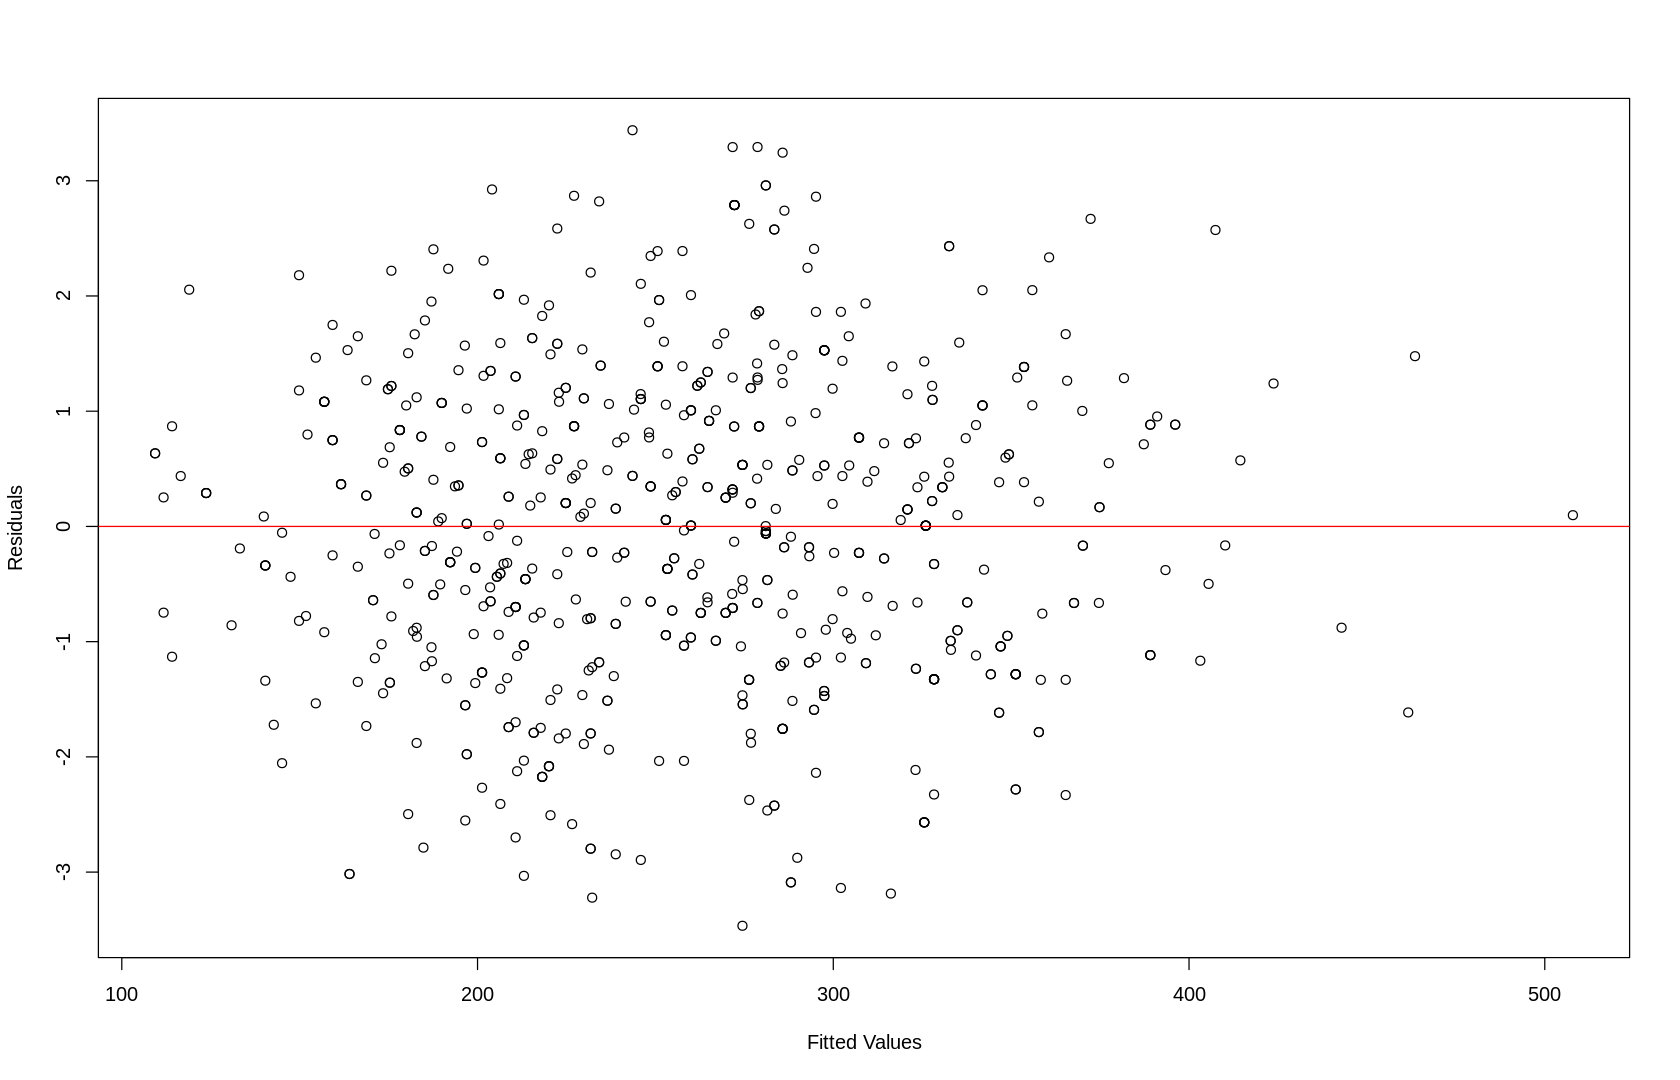

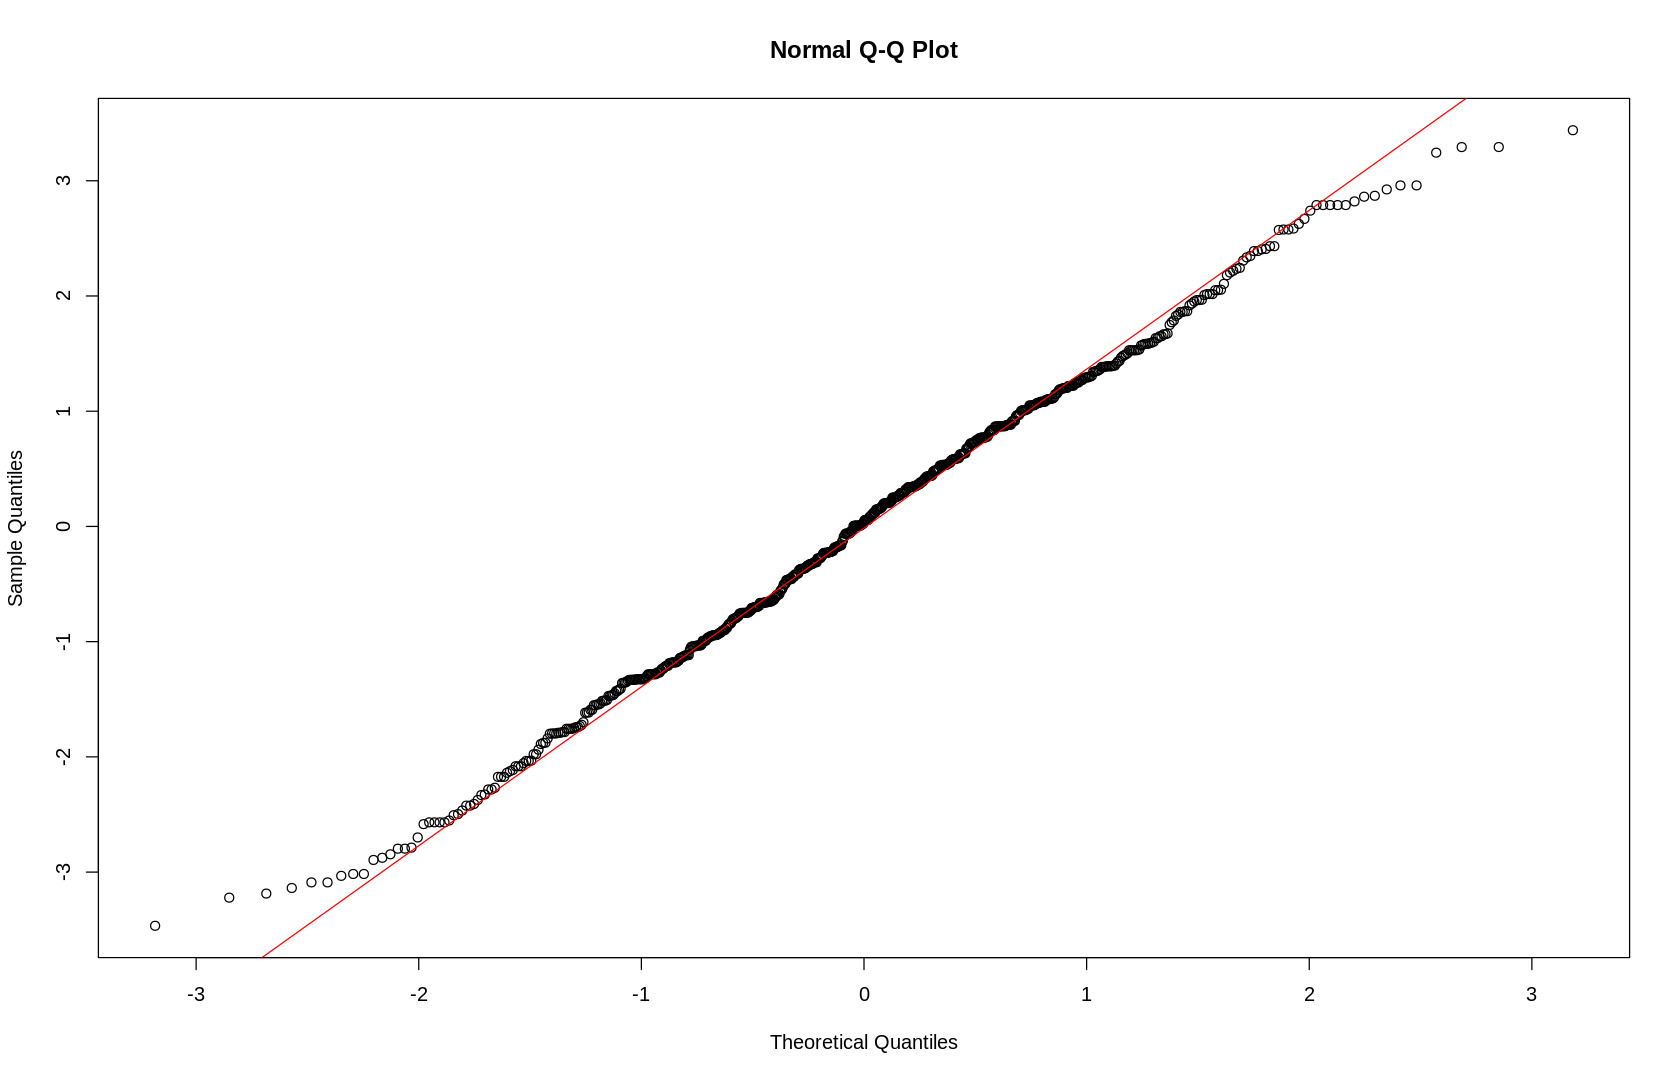

In [30]:
# Residuals vs Fitted
plot(model_10_clean$fitted.values, resid(model_10_clean), xlab="Fitted Values", ylab="Residuals")
abline(h=0, col="red")

# Normal Q-Q Plot
qqnorm(resid(model_10_clean))
qqline(resid(model_10_clean), col="red")

### Light-tailed residuals could indicate that the model may not fully capture the variability in the data, especially with regard to rare or extreme events. This could be less of a concern if the primary focus is on average behavior rather than the tails of the distribution. However, if prediction of extreme values is important for your analysis, could be important.
- If the main concern is prediction rather than inference about the coefficients, and the model's predictions are accurate, the non-normality of residuals may not be a significant issue.
- If you're making inferences about the regression coefficients, light tails are less problematic than heavy tails because they suggest less uncertainty in the extreme values than the normal distribution would indicate.
- For inference, light-tailed residuals can indicate that the model is overestimating the certainty of your predictions, which might lead to overly confident conclusions about the effects of the predictors.

### Applying transformations (log, exponential, sqrt, squared) makes the residual plot show a clear pattern and it does not make the distribution of residuals any closer to normally distributed than it already is. The residual plot without transformation shows no patterns (suggesting homoscedasticity and linearity) and the only concern is slight non-normality in residuals. However, since we have a large sample size, the Central Limit Theorem assures that the estimation of coefficients will still be approximately normally distributed, allowing for valid inference.